In [1]:
# Pandas and Numpy libraries
import pandas as pd
import numpy as np
# For preprocessing the data
from sklearn import preprocessing
# To split the dataset into train and test datasets
from sklearn.model_selection import train_test_split
# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB
# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
from scipy.stats import zscore
import warnings 
warnings.filterwarnings( "ignore")


from sklearn.linear_model import LogisticRegression
# importing ploting libraries

import seaborn as sns
#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split

# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
   
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale

from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [2]:
Company = pd.read_excel('Company_Data2015-1.xlsx')

#Glimpse of Data
Company.head()

,Co_Code,Co_Name,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,...,PBIDTM (%)[Latest],PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block
0,16974,Hind.Cables,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,...,0.00,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00
1,21214,Tata Tele. Mah.,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,...,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24
2,14852,ABG Shipyard,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26
3,2439,GTL,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,...,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90
4,23505,Bharati Defence,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,...,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05


In [3]:
Company.columns = Company.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('%', 'perc').str.replace('/', '_to_').str.replace('-','_').str.replace('[','_').str.replace(']','_').str.replace('.','_')

In [4]:
Company.head()

,Co_Code,Co_Name,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block_,Net_Working_Capital_,Current_Assets_,...,PBIDTM_perc_Latest_,PBITM_perc_Latest_,PBDTM_perc_Latest_,CPM_perc_Latest_,APATM_perc_Latest_,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block
0,16974,Hind.Cables,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,...,0.00,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00
1,21214,Tata Tele. Mah.,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,...,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24
2,14852,ABG Shipyard,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26
3,2439,GTL,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,...,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90
4,23505,Bharati Defence,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,...,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05


In [5]:
print('The number of rows (observations) is',Company.shape[0],'\n''The number of columns (variables) is',Company.shape[1])

The number of rows (observations) is 3586 
The number of columns (variables) is 67


In [6]:
Company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 67 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Co_Code                              3586 non-null   int64  
 1   Co_Name                              3586 non-null   object 
 2   Networth_Next_Year                   3586 non-null   float64
 3   Equity_Paid_Up                       3586 non-null   float64
 4   Networth                             3586 non-null   float64
 5   Capital_Employed                     3586 non-null   float64
 6   Total_Debt                           3586 non-null   float64
 7   Gross_Block_                         3586 non-null   float64
 8   Net_Working_Capital_                 3586 non-null   float64
 9   Current_Assets_                      3586 non-null   float64
 10  Current_Liabilities_and_Provisions_  3586 non-null   float64
 11  Total_Assets_to_Liabilities_  

In [7]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [8]:
#pd.set_option("display.max_columns", 100)
Company.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Co_Code,3586.0,NaN,NaN,NaN,16065.388734,19776.817379,4.0,3029.25,6077.5,24269.5,72493.0
Co_Name,3586,3586,Prajay Engg.,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Networth_Next_Year,3586.0,NaN,NaN,NaN,725.045251,4769.681004,-8021.6,3.985,19.015,123.8025,111729.1
Equity_Paid_Up,3586.0,NaN,NaN,NaN,62.966584,778.761744,0.0,3.75,8.29,19.5175,42263.46
Networth,3586.0,NaN,NaN,NaN,649.746299,4091.988792,-7027.48,3.8925,18.58,117.2975,81657.35
Capital_Employed,3586.0,NaN,NaN,NaN,2799.611054,26975.135385,-1824.75,7.6025,39.09,226.605,714001.25
Total_Debt,3586.0,NaN,NaN,NaN,1994.823779,23652.842746,-0.72,0.03,7.49,72.35,652823.81
Gross_Block_,3586.0,NaN,NaN,NaN,594.178829,4871.547802,-41.19,0.57,15.87,131.895,128477.59
Net_Working_Capital_,3586.0,NaN,NaN,NaN,410.809665,6301.218546,-13162.42,0.9425,10.145,61.175,223257.56
Current_Assets_,3586.0,NaN,NaN,NaN,1960.349172,22577.570829,-0.91,4.0,24.54,135.2775,721166.0


In [9]:
pd.options.display.float_format = '{:.2f}'.format   

Company.describe()

,Co_Code,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block_,Net_Working_Capital_,Current_Assets_,Current_Liabilities_and_Provisions_,Total_Assets_to_Liabilities_,Gross_Sales,Net_Sales,Other_Income,Value_Of_Output,Cost_of_Production,Selling_Cost,PBIDT,PBDT,PBIT,PBT,PAT,Adjusted_PAT,CP,Revenue_earnings_in_forex,Revenue_expenses_in_forex,Capital_expenses_in_forex,Book_Value_Unit_Curr,Book_Value_Adj__Unit_Curr,Market_Capitalisation,CEPS_annualised_Unit_Curr,Cash_Flow_From_Operating_Activities,Cash_Flow_From_Investing_Activities,Cash_Flow_From_Financing_Activities,ROG_Net_Worth_perc,ROG_Capital_Employed_perc,ROG_Gross_Block_perc,ROG_Gross_Sales_perc,ROG_Net_Sales_perc,ROG_Cost_of_Production_perc,ROG_Total_Assets_perc,ROG_PBIDT_perc,ROG_PBDT_perc,ROG_PBIT_perc,ROG_PBT_perc,ROG_PAT_perc,ROG_CP_perc,ROG_Revenue_earnings_in_forex_perc,ROG_Revenue_expenses_in_forex_perc,ROG_Market_Capitalisation_perc,Current_Ratio_Latest_,Fixed_Assets_Ratio_Latest_,Inventory_Ratio_Latest_,Debtors_Ratio_Latest_,Total_Asset_Turnover_Ratio_Latest_,Interest_Cover_Ratio_Latest_,PBIDTM_perc_Latest_,PBITM_perc_Latest_,PBDTM_perc_Latest_,CPM_perc_Latest_,APATM_perc_Latest_,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block
count,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3582.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3585.00,3585.00,3585.00,3585.00,3585.00,3585.00,3585.00,3585.00,3585.00,3585.00,3585.00,3586.00,3586.00,3483.00,3586.00,3586.00
mean,16065.39,725.05,62.97,649.75,2799.61,1994.82,594.18,410.81,1960.35,391.99,1778.45,1123.74,1079.70,48.73,1077.19,798.54,25.55,248.18,116.27,217.66,85.75,61.22,60.06,91.73,131.17,256.33,7.66,157.24,2243.15,1664.09,36.02,65.77,-60.87,11.44,1237.62,2988.88,37.55,242.67,242.59,310.49,2793.28,375.85,336.38,374.70,224.07,112.23,221.09,37.23,364.86,63.68,12.06,51.54,37.80,33.03,1.24,16.39,-51.16,-109.21,-311.57,-307.01,-365.06,603.89,2057.85,79.64,0.82,61.88
std,19776.82,4769.68,778.76,4091.99,26975.14,23652.84,4871.55,6301.22,22577.57,2675.00,11437.57,10603.70,9996.57,426.04,9843.88,9076.70,194.24,1949.59,956.20,1850.97,799.93,620.30,580.43,780.79,1150.73,4132.34,111.43,1622.66,128283.73,12805.17,828.42,1455.05,701.97,1272.26,41041.93,126472.87,893.62,6103.53,6103.49,5573.22,125941.65,23278.40,20353.40,22462.79,19659.23,13480.52,13980.20,658.67,15233.64,1047.93,108.41,681.15,458.19,489.56,2.67,351.74,1795.13,3057.64,10921.59,10676.15,12500.05,10636.76,54169.48,137.85,1.20,976.82
min,4.00,-8021.60,0.00,-7027.48,-1824.75,-0.72,-41.19,-13162.42,-0.91,-0.23,-4.51,-62.59,-62.59,-448.72,-119.10,-22.65,0.00,-4655.14,-5874.53,-4812.95,-6032.34,-6032.34,-4418.72,-5874.53,0.00,0.00,0.00,-3371.57,-33715.70,0.00,-1808.00,-25469.23,-23843.45,-38374.04,-14485.71,-8614.63,-116.12,-5503.70,-5503.70,-2130.23,-136.13,-52200.00,-52200.00,-58500.00,-78900.00,-114500.00,-52200.00,-100.00,-100.00,-98.05,0.00,0.00,0.00,0.00,0.00,-5450.00,-78870.45,-141600.00,-590500.00,-572000.00,-688600.00,0.00,0.00,-199.00,-0.33,-61.00
25%,3029.25,3.98,3.75,3.89,7.60,0.03,0.57,0.94,4.00,0.73,10.55,1.44,1.44,0.02,1.41,0.94,0.00,0.04,0.00,0.00,-0.06,-0.06,-0.09,0.00,0.00,0.00,0.00,7.96,7.06,0.00,0.00,-0.31,-5.12,-5.85,-1.49,-3.83,0.00,-8.08,-8.12,-7.24,-3.97,-23.36,-30.60,-31.35,-41.23,-43.73,-29.51,0.00,0.00,0.00,0.88,0.27,0.00,0.42,0.07,0.00,0.00,0.00,0.00,0.00,0.00,8.00,8.00,0.00,0.07,0.27
50%,6077.50,19.02,8.29,18.58,39.09,7.49,15.87,10.14,24.54,9.23,52.01,31.21,30.44,0.45,30.89,25.99,0.16,2.04,0.80,1.15,0.31,0.26,0.21,0.74,0.00,0.00,0.00,21.66,18.93,8.37,1.15,0.45,-0.12,0.00,1.84,1.38,0.25,3.31,3.21,4.42,1.48,4.57,3.37,2.13,0.03,0.00,4.62,0.0

In [10]:
Company['default'] = np.where((Company['Networth_Next_Year'] > 0), 0, 1)

In [11]:
Company[['default','Networth_Next_Year']].head(10)

,default,Networth_Next_Year
0,1,-8021.60
1,1,-3986.19
2,1,-3192.58
3,1,-3054.51
4,1,-2967.36
5,1,-2519.40
6,1,-2125.05
7,1,-2100.56
8,1,-1695.75
9,1,-1677.18


In [12]:
Company['default'].value_counts()

0    3198
1     388
Name: default, dtype: int64

In [13]:
Company['default'].value_counts(normalize = True)

0   0.89
1   0.11
Name: default, dtype: float64

In [14]:
Company_X = Company.drop('default', axis = 1)
Company_Y = Company['default']

In [15]:
Company.isnull().sum()

Co_Code                                  0
Co_Name                                  0
Networth_Next_Year                       0
Equity_Paid_Up                           0
Networth                                 0
Capital_Employed                         0
Total_Debt                               0
Gross_Block_                             0
Net_Working_Capital_                     0
Current_Assets_                          0
Current_Liabilities_and_Provisions_      0
Total_Assets_to_Liabilities_             0
Gross_Sales                              0
Net_Sales                                0
Other_Income                             0
Value_Of_Output                          0
Cost_of_Production                       0
Selling_Cost                             0
PBIDT                                    0
PBDT                                     0
PBIT                                     0
PBT                                      0
PAT                                      0
Adjusted_PA

In [16]:
Company.isnull().sum().sort_values(ascending = False)/Company.index.size

Inventory_Velocity_Days               0.03
Book_Value_Adj__Unit_Curr             0.00
Current_Ratio_Latest_                 0.00
PBITM_perc_Latest_                    0.00
Fixed_Assets_Ratio_Latest_            0.00
Inventory_Ratio_Latest_               0.00
Debtors_Ratio_Latest_                 0.00
Total_Asset_Turnover_Ratio_Latest_    0.00
Interest_Cover_Ratio_Latest_          0.00
PBIDTM_perc_Latest_                   0.00
PBDTM_perc_Latest_                    0.00
CPM_perc_Latest_                      0.00
APATM_perc_Latest_                    0.00
ROG_PBT_perc                          0.00
ROG_Net_Sales_perc                    0.00
ROG_Gross_Sales_perc                  0.00
ROG_Gross_Block_perc                  0.00
ROG_Cost_of_Production_perc           0.00
ROG_Total_Assets_perc                 0.00
ROG_PBIDT_perc                        0.00
ROG_PBDT_perc                         0.00
ROG_PBIT_perc                         0.00
Co_Code                               0.00
ROG_PAT_per

In [17]:
Company.size

243848

In [18]:
Company.isnull().sum().sum()

118

In [19]:
from sklearn.impute import KNNImputer

In [20]:
imputer = KNNImputer(n_neighbors=10)

In [21]:
Company.drop('Co_Code', axis=1, inplace=True)

Company.drop('Co_Name', axis=1, inplace=True)

In [22]:
Company_imputed = pd.DataFrame(imputer.fit_transform(Company), columns = Company.columns)

In [23]:
Company_imputed.isnull().sum()

Networth_Next_Year                     0
Equity_Paid_Up                         0
Networth                               0
Capital_Employed                       0
Total_Debt                             0
Gross_Block_                           0
Net_Working_Capital_                   0
Current_Assets_                        0
Current_Liabilities_and_Provisions_    0
Total_Assets_to_Liabilities_           0
Gross_Sales                            0
Net_Sales                              0
Other_Income                           0
Value_Of_Output                        0
Cost_of_Production                     0
Selling_Cost                           0
PBIDT                                  0
PBDT                                   0
PBIT                                   0
PBT                                    0
PAT                                    0
Adjusted_PAT                           0
CP                                     0
Revenue_earnings_in_forex              0
Revenue_expenses

In [24]:
Company = Company_imputed

In [25]:
Company.columns

Index(['Networth_Next_Year', 'Equity_Paid_Up', 'Networth', 'Capital_Employed',
       'Total_Debt', 'Gross_Block_', 'Net_Working_Capital_', 'Current_Assets_',
       'Current_Liabilities_and_Provisions_', 'Total_Assets_to_Liabilities_',
       'Gross_Sales', 'Net_Sales', 'Other_Income', 'Value_Of_Output',
       'Cost_of_Production', 'Selling_Cost', 'PBIDT', 'PBDT', 'PBIT', 'PBT',
       'PAT', 'Adjusted_PAT', 'CP', 'Revenue_earnings_in_forex',
       'Revenue_expenses_in_forex', 'Capital_expenses_in_forex',
       'Book_Value_Unit_Curr', 'Book_Value_Adj__Unit_Curr',
       'Market_Capitalisation', 'CEPS_annualised_Unit_Curr',
       'Cash_Flow_From_Operating_Activities',
       'Cash_Flow_From_Investing_Activities',
       'Cash_Flow_From_Financing_Activities', 'ROG_Net_Worth_perc',
       'ROG_Capital_Employed_perc', 'ROG_Gross_Block_perc',
       'ROG_Gross_Sales_perc', 'ROG_Net_Sales_perc',
       'ROG_Cost_of_Production_perc', 'ROG_Total_Assets_perc',
       'ROG_PBIDT_perc', 'ROG

In [26]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(Company[column].describe(),end=' ')
    
    
    plt.figure(figsize=(4,4))
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    plt.hist(x=Company[column])
    plt.show()
    
    plt.figure(figsize=(4,4))
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=Company[column])

    plt.show()

In [27]:
df_num2 = Company.select_dtypes(include = ['float64', 'int64','int8'])
lstnumericcolumns = list(df_num2.columns.values)
len(lstnumericcolumns)

66

Description of Networth_Next_Year
----------------------------------------------------------------------------
count     3586.00
mean       725.05
std       4769.68
min      -8021.60
25%          3.98
50%         19.02
75%        123.80
max     111729.10
Name: Networth_Next_Year, dtype: float64 Distribution of Networth_Next_Year
----------------------------------------------------------------------------


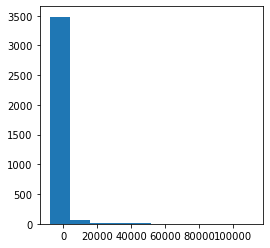

BoxPlot of Networth_Next_Year
----------------------------------------------------------------------------


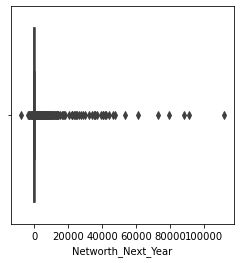

Description of Equity_Paid_Up
----------------------------------------------------------------------------
count    3586.00
mean       62.97
std       778.76
min         0.00
25%         3.75
50%         8.29
75%        19.52
max     42263.46
Name: Equity_Paid_Up, dtype: float64 Distribution of Equity_Paid_Up
----------------------------------------------------------------------------


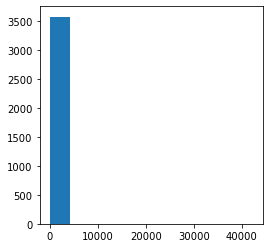

BoxPlot of Equity_Paid_Up
----------------------------------------------------------------------------


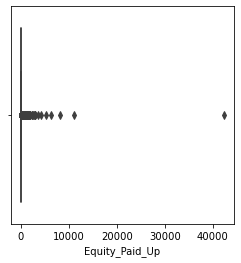

Description of Networth
----------------------------------------------------------------------------
count    3586.00
mean      649.75
std      4091.99
min     -7027.48
25%         3.89
50%        18.58
75%       117.30
max     81657.35
Name: Networth, dtype: float64 Distribution of Networth
----------------------------------------------------------------------------


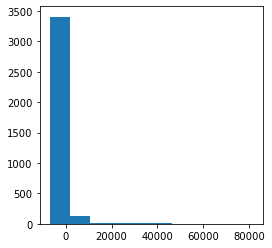

BoxPlot of Networth
----------------------------------------------------------------------------


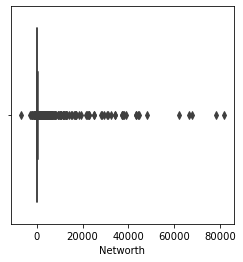

Description of Capital_Employed
----------------------------------------------------------------------------
count     3586.00
mean      2799.61
std      26975.14
min      -1824.75
25%          7.60
50%         39.09
75%        226.60
max     714001.25
Name: Capital_Employed, dtype: float64 Distribution of Capital_Employed
----------------------------------------------------------------------------


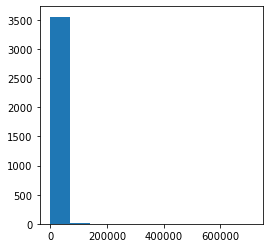

BoxPlot of Capital_Employed
----------------------------------------------------------------------------


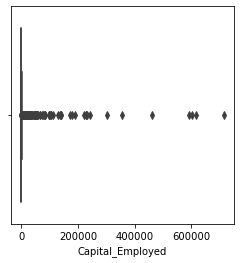

Description of Total_Debt
----------------------------------------------------------------------------
count     3586.00
mean      1994.82
std      23652.84
min         -0.72
25%          0.03
50%          7.49
75%         72.35
max     652823.81
Name: Total_Debt, dtype: float64 Distribution of Total_Debt
----------------------------------------------------------------------------


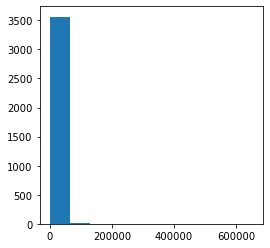

BoxPlot of Total_Debt
----------------------------------------------------------------------------


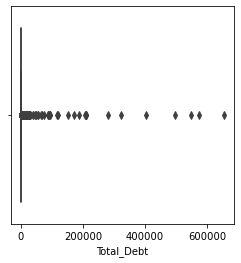

Description of Gross_Block_
----------------------------------------------------------------------------
count     3586.00
mean       594.18
std       4871.55
min        -41.19
25%          0.57
50%         15.87
75%        131.90
max     128477.59
Name: Gross_Block_, dtype: float64 Distribution of Gross_Block_
----------------------------------------------------------------------------


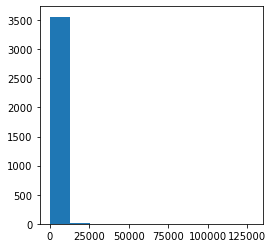

BoxPlot of Gross_Block_
----------------------------------------------------------------------------


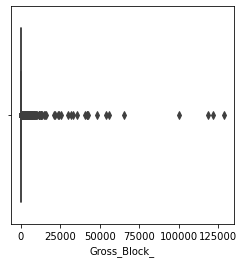

Description of Net_Working_Capital_
----------------------------------------------------------------------------
count     3586.00
mean       410.81
std       6301.22
min     -13162.42
25%          0.94
50%         10.14
75%         61.17
max     223257.56
Name: Net_Working_Capital_, dtype: float64 Distribution of Net_Working_Capital_
----------------------------------------------------------------------------


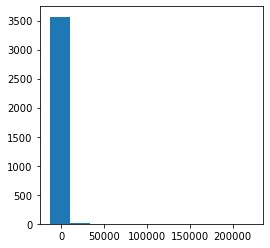

BoxPlot of Net_Working_Capital_
----------------------------------------------------------------------------


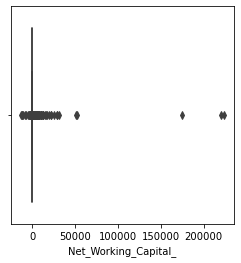

Description of Current_Assets_
----------------------------------------------------------------------------
count     3586.00
mean      1960.35
std      22577.57
min         -0.91
25%          4.00
50%         24.54
75%        135.28
max     721166.00
Name: Current_Assets_, dtype: float64 Distribution of Current_Assets_
----------------------------------------------------------------------------


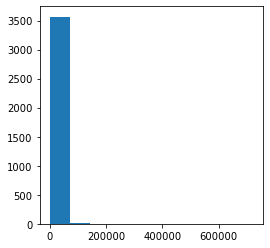

BoxPlot of Current_Assets_
----------------------------------------------------------------------------


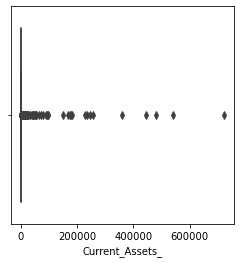

Description of Current_Liabilities_and_Provisions_
----------------------------------------------------------------------------
count    3586.00
mean      391.99
std      2675.00
min        -0.23
25%         0.73
50%         9.23
75%        65.65
max     83232.98
Name: Current_Liabilities_and_Provisions_, dtype: float64 Distribution of Current_Liabilities_and_Provisions_
----------------------------------------------------------------------------


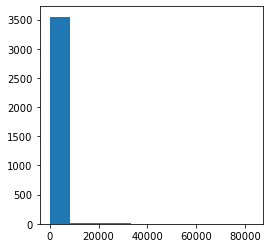

BoxPlot of Current_Liabilities_and_Provisions_
----------------------------------------------------------------------------


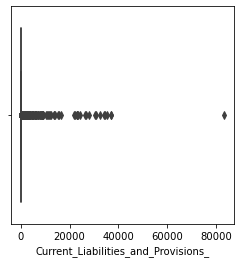

Description of Total_Assets_to_Liabilities_
----------------------------------------------------------------------------
count     3586.00
mean      1778.45
std      11437.57
min         -4.51
25%         10.55
50%         52.01
75%        310.54
max     254737.22
Name: Total_Assets_to_Liabilities_, dtype: float64 Distribution of Total_Assets_to_Liabilities_
----------------------------------------------------------------------------


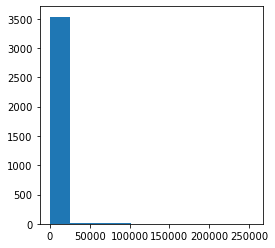

BoxPlot of Total_Assets_to_Liabilities_
----------------------------------------------------------------------------


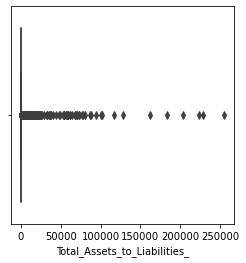

Description of Gross_Sales
----------------------------------------------------------------------------
count     3586.00
mean      1123.74
std      10603.70
min        -62.59
25%          1.44
50%         31.21
75%        242.25
max     474182.94
Name: Gross_Sales, dtype: float64 Distribution of Gross_Sales
----------------------------------------------------------------------------


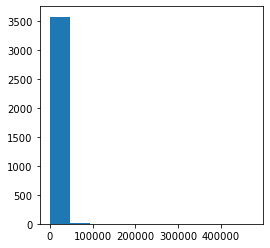

BoxPlot of Gross_Sales
----------------------------------------------------------------------------


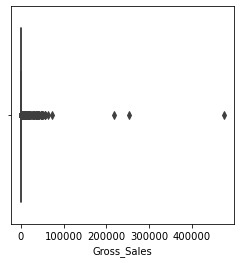

Description of Net_Sales
----------------------------------------------------------------------------
count     3586.00
mean      1079.70
std       9996.57
min        -62.59
25%          1.44
50%         30.44
75%        234.44
max     443775.16
Name: Net_Sales, dtype: float64 Distribution of Net_Sales
----------------------------------------------------------------------------


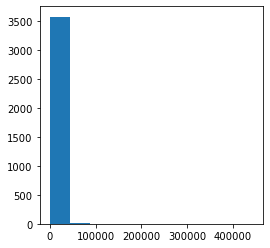

BoxPlot of Net_Sales
----------------------------------------------------------------------------


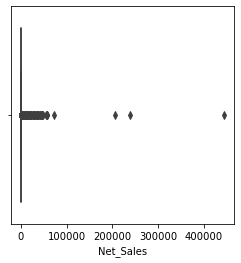

Description of Other_Income
----------------------------------------------------------------------------
count    3586.00
mean       48.73
std       426.04
min      -448.72
25%         0.02
50%         0.45
75%         3.64
max     14143.40
Name: Other_Income, dtype: float64 Distribution of Other_Income
----------------------------------------------------------------------------


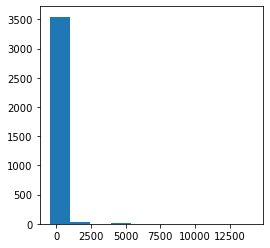

BoxPlot of Other_Income
----------------------------------------------------------------------------


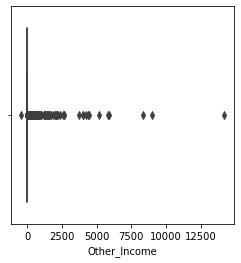

Description of Value_Of_Output
----------------------------------------------------------------------------
count     3586.00
mean      1077.19
std       9843.88
min       -119.10
25%          1.41
50%         30.89
75%        235.84
max     435559.09
Name: Value_Of_Output, dtype: float64 Distribution of Value_Of_Output
----------------------------------------------------------------------------


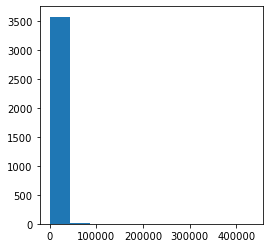

BoxPlot of Value_Of_Output
----------------------------------------------------------------------------


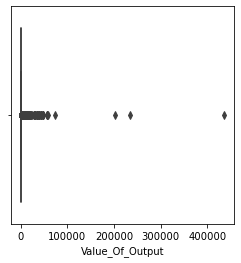

Description of Cost_of_Production
----------------------------------------------------------------------------
count     3586.00
mean       798.54
std       9076.70
min        -22.65
25%          0.94
50%         25.99
75%        189.55
max     419913.50
Name: Cost_of_Production, dtype: float64 Distribution of Cost_of_Production
----------------------------------------------------------------------------


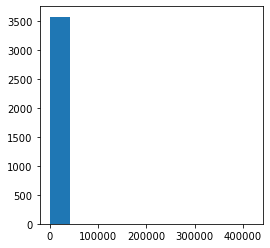

BoxPlot of Cost_of_Production
----------------------------------------------------------------------------


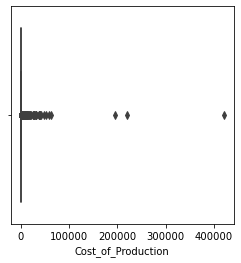

Description of Selling_Cost
----------------------------------------------------------------------------
count   3586.00
mean      25.55
std      194.24
min        0.00
25%        0.00
50%        0.16
75%        3.88
max     5283.91
Name: Selling_Cost, dtype: float64 Distribution of Selling_Cost
----------------------------------------------------------------------------


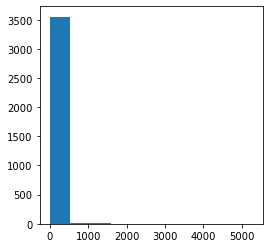

BoxPlot of Selling_Cost
----------------------------------------------------------------------------


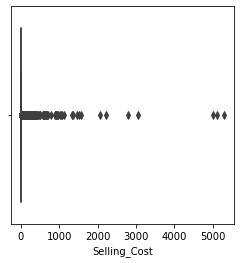

Description of PBIDT
----------------------------------------------------------------------------
count    3586.00
mean      248.18
std      1949.59
min     -4655.14
25%         0.04
50%         2.04
75%        23.52
max     42059.26
Name: PBIDT, dtype: float64 Distribution of PBIDT
----------------------------------------------------------------------------


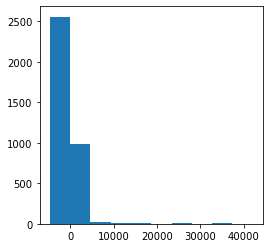

BoxPlot of PBIDT
----------------------------------------------------------------------------


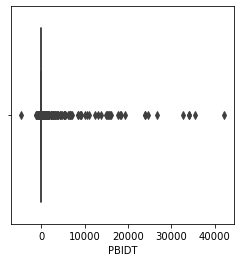

Description of PBDT
----------------------------------------------------------------------------
count    3586.00
mean      116.27
std       956.20
min     -5874.53
25%         0.00
50%         0.80
75%        12.95
max     23215.00
Name: PBDT, dtype: float64 Distribution of PBDT
----------------------------------------------------------------------------


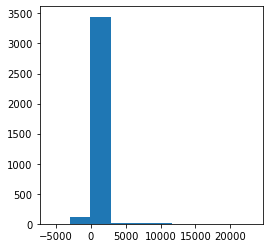

BoxPlot of PBDT
----------------------------------------------------------------------------


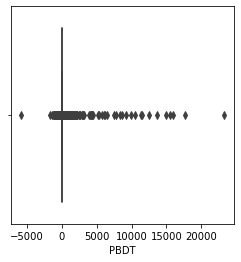

Description of PBIT
----------------------------------------------------------------------------
count    3586.00
mean      217.66
std      1850.97
min     -4812.95
25%         0.00
50%         1.15
75%        16.67
max     41402.96
Name: PBIT, dtype: float64 Distribution of PBIT
----------------------------------------------------------------------------


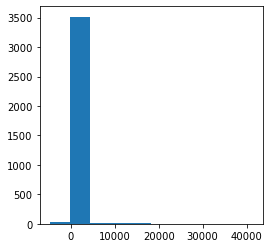

BoxPlot of PBIT
----------------------------------------------------------------------------


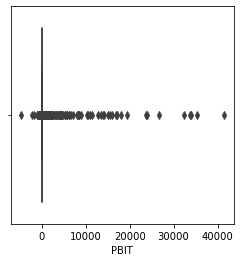

Description of PBT
----------------------------------------------------------------------------
count    3586.00
mean       85.75
std       799.93
min     -6032.34
25%        -0.06
50%         0.31
75%         7.42
max     16798.00
Name: PBT, dtype: float64 Distribution of PBT
----------------------------------------------------------------------------


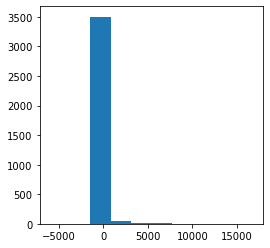

BoxPlot of PBT
----------------------------------------------------------------------------


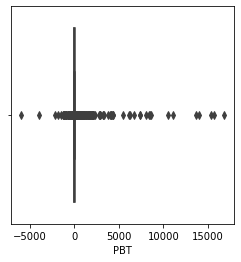

Description of PAT
----------------------------------------------------------------------------
count    3586.00
mean       61.22
std       620.30
min     -6032.34
25%        -0.06
50%         0.26
75%         5.54
max     13383.39
Name: PAT, dtype: float64 Distribution of PAT
----------------------------------------------------------------------------


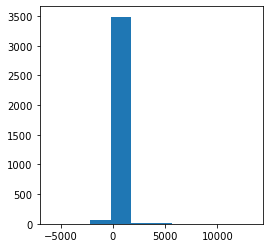

BoxPlot of PAT
----------------------------------------------------------------------------


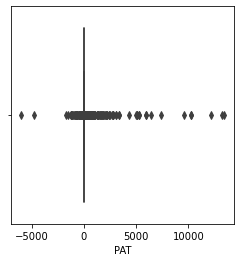

Description of Adjusted_PAT
----------------------------------------------------------------------------
count    3586.00
mean       60.06
std       580.43
min     -4418.72
25%        -0.09
50%         0.21
75%         5.34
max     13384.11
Name: Adjusted_PAT, dtype: float64 Distribution of Adjusted_PAT
----------------------------------------------------------------------------


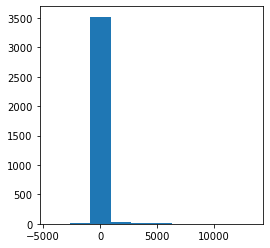

BoxPlot of Adjusted_PAT
----------------------------------------------------------------------------


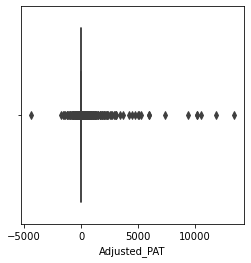

Description of CP
----------------------------------------------------------------------------
count    3586.00
mean       91.73
std       780.79
min     -5874.53
25%         0.00
50%         0.74
75%        10.91
max     20760.20
Name: CP, dtype: float64 Distribution of CP
----------------------------------------------------------------------------


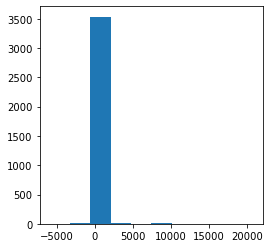

BoxPlot of CP
----------------------------------------------------------------------------


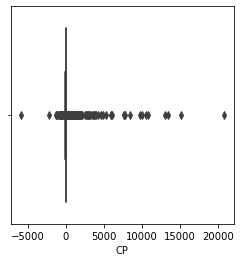

Description of Revenue_earnings_in_forex
----------------------------------------------------------------------------
count    3586.00
mean      131.17
std      1150.73
min         0.00
25%         0.00
50%         0.00
75%         7.20
max     46158.00
Name: Revenue_earnings_in_forex, dtype: float64 Distribution of Revenue_earnings_in_forex
----------------------------------------------------------------------------


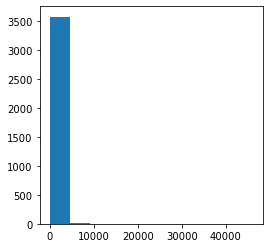

BoxPlot of Revenue_earnings_in_forex
----------------------------------------------------------------------------


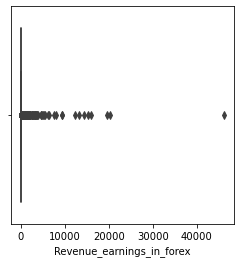

Description of Revenue_expenses_in_forex
----------------------------------------------------------------------------
count     3586.00
mean       256.33
std       4132.34
min          0.00
25%          0.00
50%          0.00
75%          6.99
max     193979.73
Name: Revenue_expenses_in_forex, dtype: float64 Distribution of Revenue_expenses_in_forex
----------------------------------------------------------------------------


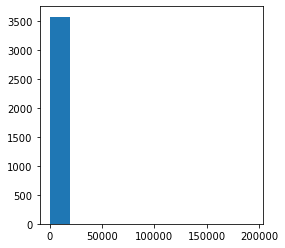

BoxPlot of Revenue_expenses_in_forex
----------------------------------------------------------------------------


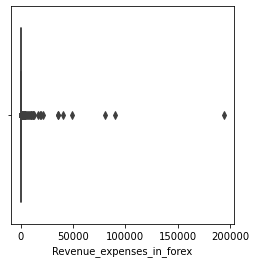

Description of Capital_expenses_in_forex
----------------------------------------------------------------------------
count   3586.00
mean       7.66
std      111.43
min        0.00
25%        0.00
50%        0.00
75%        0.00
max     3722.10
Name: Capital_expenses_in_forex, dtype: float64 Distribution of Capital_expenses_in_forex
----------------------------------------------------------------------------


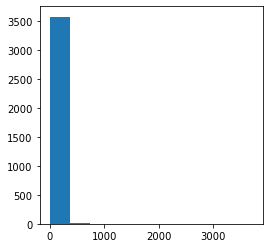

BoxPlot of Capital_expenses_in_forex
----------------------------------------------------------------------------


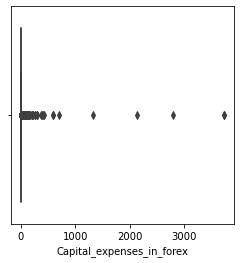

Description of Book_Value_Unit_Curr
----------------------------------------------------------------------------
count    3586.00
mean      157.24
std      1622.66
min     -3371.57
25%         7.96
50%        21.66
75%        71.67
max     75790.00
Name: Book_Value_Unit_Curr, dtype: float64 Distribution of Book_Value_Unit_Curr
----------------------------------------------------------------------------


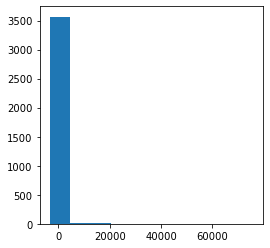

BoxPlot of Book_Value_Unit_Curr
----------------------------------------------------------------------------


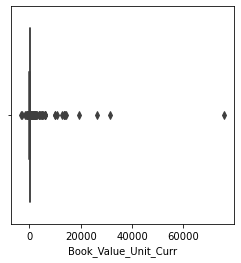

Description of Book_Value_Adj__Unit_Curr
----------------------------------------------------------------------------
count      3586.00
mean       2240.67
std      128212.16
min      -33715.70
25%           7.06
50%          18.92
75%          59.96
max     7677600.29
Name: Book_Value_Adj__Unit_Curr, dtype: float64 Distribution of Book_Value_Adj__Unit_Curr
----------------------------------------------------------------------------


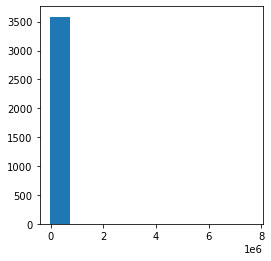

BoxPlot of Book_Value_Adj__Unit_Curr
----------------------------------------------------------------------------


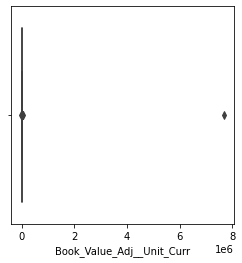

Description of Market_Capitalisation
----------------------------------------------------------------------------
count     3586.00
mean      1664.09
std      12805.17
min          0.00
25%          0.00
50%          8.37
75%        111.46
max     260865.08
Name: Market_Capitalisation, dtype: float64 Distribution of Market_Capitalisation
----------------------------------------------------------------------------


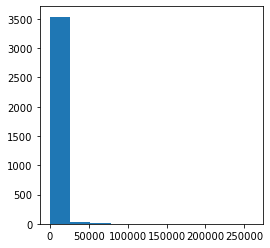

BoxPlot of Market_Capitalisation
----------------------------------------------------------------------------


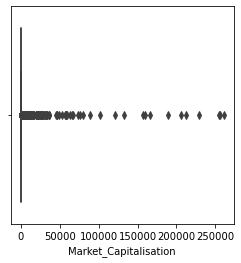

Description of CEPS_annualised_Unit_Curr
----------------------------------------------------------------------------
count    3586.00
mean       36.02
std       828.42
min     -1808.00
25%         0.00
50%         1.15
75%         8.77
max     45438.44
Name: CEPS_annualised_Unit_Curr, dtype: float64 Distribution of CEPS_annualised_Unit_Curr
----------------------------------------------------------------------------


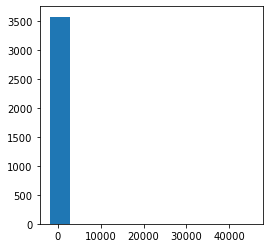

BoxPlot of CEPS_annualised_Unit_Curr
----------------------------------------------------------------------------


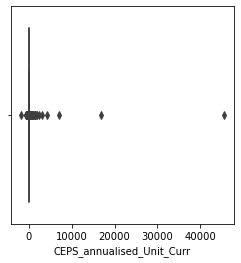

Description of Cash_Flow_From_Operating_Activities
----------------------------------------------------------------------------
count     3586.00
mean        65.77
std       1455.05
min     -25469.23
25%         -0.31
50%          0.45
75%         12.65
max      44529.40
Name: Cash_Flow_From_Operating_Activities, dtype: float64 Distribution of Cash_Flow_From_Operating_Activities
----------------------------------------------------------------------------


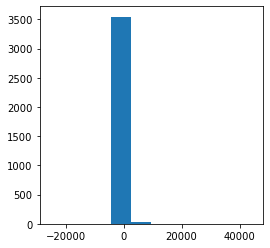

BoxPlot of Cash_Flow_From_Operating_Activities
----------------------------------------------------------------------------


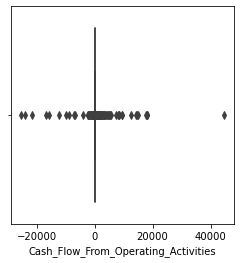

Description of Cash_Flow_From_Investing_Activities
----------------------------------------------------------------------------
count     3586.00
mean       -60.87
std        701.97
min     -23843.45
25%         -5.12
50%         -0.12
75%          0.12
max       3732.98
Name: Cash_Flow_From_Investing_Activities, dtype: float64 Distribution of Cash_Flow_From_Investing_Activities
----------------------------------------------------------------------------


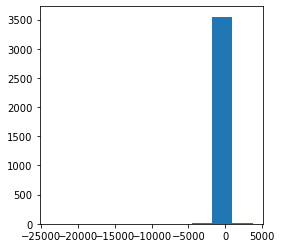

BoxPlot of Cash_Flow_From_Investing_Activities
----------------------------------------------------------------------------


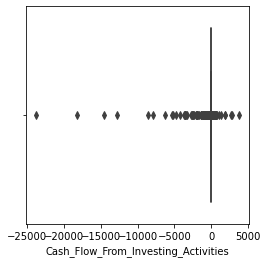

Description of Cash_Flow_From_Financing_Activities
----------------------------------------------------------------------------
count     3586.00
mean        11.44
std       1272.26
min     -38374.04
25%         -5.85
50%          0.00
75%          0.46
max      28846.00
Name: Cash_Flow_From_Financing_Activities, dtype: float64 Distribution of Cash_Flow_From_Financing_Activities
----------------------------------------------------------------------------


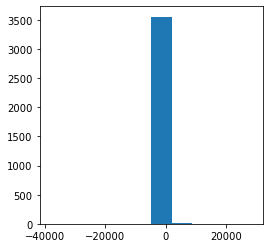

BoxPlot of Cash_Flow_From_Financing_Activities
----------------------------------------------------------------------------


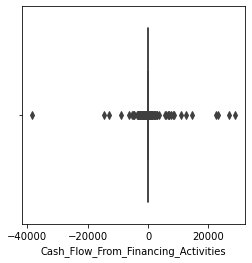

Description of ROG_Net_Worth_perc
----------------------------------------------------------------------------
count      3586.00
mean       1237.62
std       41041.93
min      -14485.71
25%          -1.49
50%           1.84
75%          11.36
max     2144020.00
Name: ROG_Net_Worth_perc, dtype: float64 Distribution of ROG_Net_Worth_perc
----------------------------------------------------------------------------


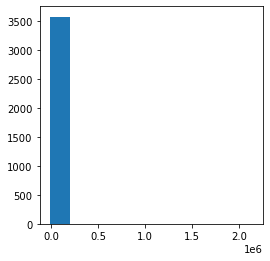

BoxPlot of ROG_Net_Worth_perc
----------------------------------------------------------------------------


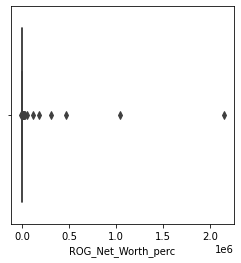

Description of ROG_Capital_Employed_perc
----------------------------------------------------------------------------
count      3586.00
mean       2988.88
std      126472.87
min       -8614.63
25%          -3.83
50%           1.38
75%          12.59
max     7412700.00
Name: ROG_Capital_Employed_perc, dtype: float64 Distribution of ROG_Capital_Employed_perc
----------------------------------------------------------------------------


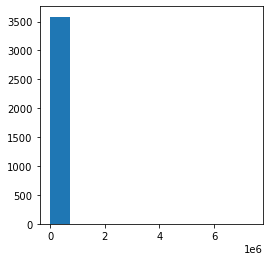

BoxPlot of ROG_Capital_Employed_perc
----------------------------------------------------------------------------


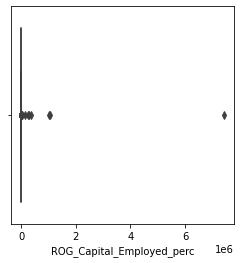

Description of ROG_Gross_Block_perc
----------------------------------------------------------------------------
count    3586.00
mean       37.55
std       893.62
min      -116.12
25%         0.00
50%         0.25
75%         6.72
max     47400.00
Name: ROG_Gross_Block_perc, dtype: float64 Distribution of ROG_Gross_Block_perc
----------------------------------------------------------------------------


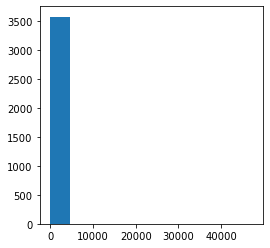

BoxPlot of ROG_Gross_Block_perc
----------------------------------------------------------------------------


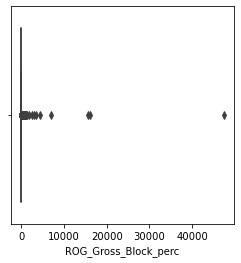

Description of ROG_Gross_Sales_perc
----------------------------------------------------------------------------
count     3586.00
mean       242.67
std       6103.53
min      -5503.70
25%         -8.08
50%          3.31
75%         21.53
max     320200.00
Name: ROG_Gross_Sales_perc, dtype: float64 Distribution of ROG_Gross_Sales_perc
----------------------------------------------------------------------------


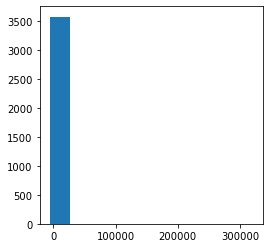

BoxPlot of ROG_Gross_Sales_perc
----------------------------------------------------------------------------


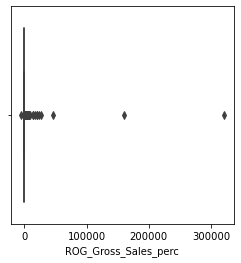

Description of ROG_Net_Sales_perc
----------------------------------------------------------------------------
count     3586.00
mean       242.59
std       6103.49
min      -5503.70
25%         -8.12
50%          3.21
75%         21.57
max     320200.00
Name: ROG_Net_Sales_perc, dtype: float64 Distribution of ROG_Net_Sales_perc
----------------------------------------------------------------------------


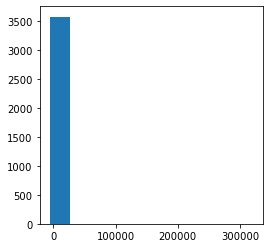

BoxPlot of ROG_Net_Sales_perc
----------------------------------------------------------------------------


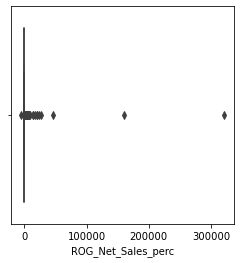

Description of ROG_Cost_of_Production_perc
----------------------------------------------------------------------------
count     3586.00
mean       310.49
std       5573.22
min      -2130.23
25%         -7.24
50%          4.42
75%         23.12
max     267150.00
Name: ROG_Cost_of_Production_perc, dtype: float64 Distribution of ROG_Cost_of_Production_perc
----------------------------------------------------------------------------


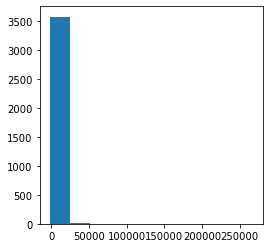

BoxPlot of ROG_Cost_of_Production_perc
----------------------------------------------------------------------------


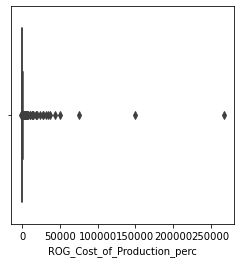

Description of ROG_Total_Assets_perc
----------------------------------------------------------------------------
count      3586.00
mean       2793.28
std      125941.65
min        -136.13
25%          -3.97
50%           1.48
75%          12.50
max     7422120.00
Name: ROG_Total_Assets_perc, dtype: float64 Distribution of ROG_Total_Assets_perc
----------------------------------------------------------------------------


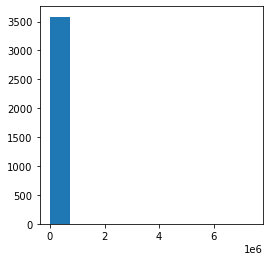

BoxPlot of ROG_Total_Assets_perc
----------------------------------------------------------------------------


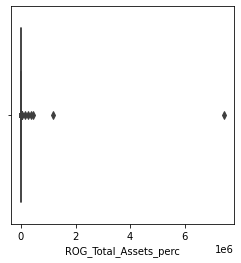

Description of ROG_PBIDT_perc
----------------------------------------------------------------------------
count      3586.00
mean        375.85
std       23278.40
min      -52200.00
25%         -23.36
50%           4.57
75%          47.88
max     1386200.00
Name: ROG_PBIDT_perc, dtype: float64 Distribution of ROG_PBIDT_perc
----------------------------------------------------------------------------


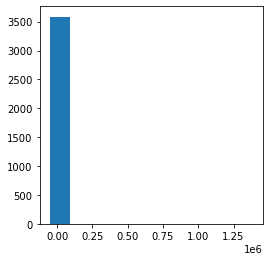

BoxPlot of ROG_PBIDT_perc
----------------------------------------------------------------------------


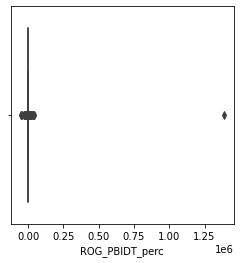

Description of ROG_PBDT_perc
----------------------------------------------------------------------------
count      3586.00
mean        336.38
std       20353.40
min      -52200.00
25%         -30.60
50%           3.37
75%          52.91
max     1208700.00
Name: ROG_PBDT_perc, dtype: float64 Distribution of ROG_PBDT_perc
----------------------------------------------------------------------------


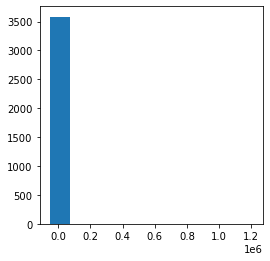

BoxPlot of ROG_PBDT_perc
----------------------------------------------------------------------------


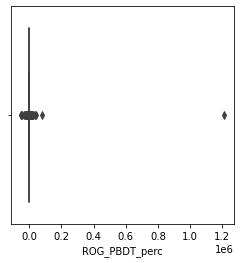

Description of ROG_PBIT_perc
----------------------------------------------------------------------------
count      3586.00
mean        374.70
std       22462.79
min      -58500.00
25%         -31.35
50%           2.13
75%          50.14
max     1338000.00
Name: ROG_PBIT_perc, dtype: float64 Distribution of ROG_PBIT_perc
----------------------------------------------------------------------------


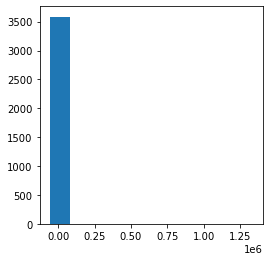

BoxPlot of ROG_PBIT_perc
----------------------------------------------------------------------------


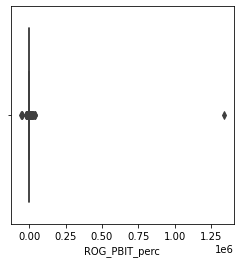

Description of ROG_PBT_perc
----------------------------------------------------------------------------
count      3586.00
mean        224.07
std       19659.23
min      -78900.00
25%         -41.23
50%           0.03
75%          61.96
max     1160500.00
Name: ROG_PBT_perc, dtype: float64 Distribution of ROG_PBT_perc
----------------------------------------------------------------------------


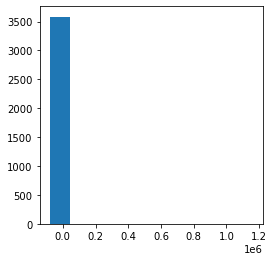

BoxPlot of ROG_PBT_perc
----------------------------------------------------------------------------


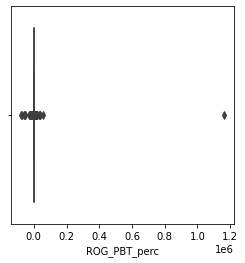

Description of ROG_PAT_perc
----------------------------------------------------------------------------
count      3586.00
mean        112.23
std       13480.52
min     -114500.00
25%         -43.73
50%           0.00
75%          65.35
max      774200.00
Name: ROG_PAT_perc, dtype: float64 Distribution of ROG_PAT_perc
----------------------------------------------------------------------------


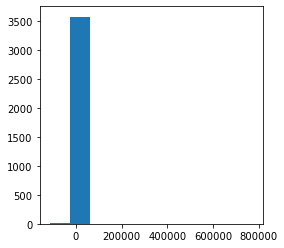

BoxPlot of ROG_PAT_perc
----------------------------------------------------------------------------


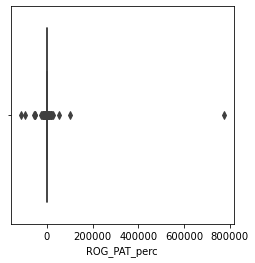

Description of ROG_CP_perc
----------------------------------------------------------------------------
count     3586.00
mean       221.09
std      13980.20
min     -52200.00
25%        -29.51
50%          4.62
75%         52.91
max     822400.00
Name: ROG_CP_perc, dtype: float64 Distribution of ROG_CP_perc
----------------------------------------------------------------------------


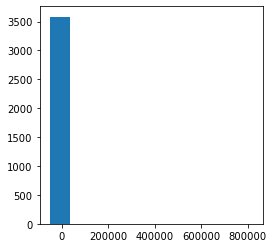

BoxPlot of ROG_CP_perc
----------------------------------------------------------------------------


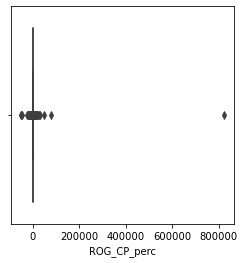

Description of ROG_Revenue_earnings_in_forex_perc
----------------------------------------------------------------------------
count    3586.00
mean       37.23
std       658.67
min      -100.00
25%         0.00
50%         0.00
75%         0.00
max     29084.77
Name: ROG_Revenue_earnings_in_forex_perc, dtype: float64 Distribution of ROG_Revenue_earnings_in_forex_perc
----------------------------------------------------------------------------


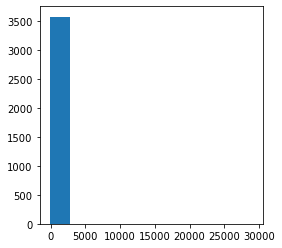

BoxPlot of ROG_Revenue_earnings_in_forex_perc
----------------------------------------------------------------------------


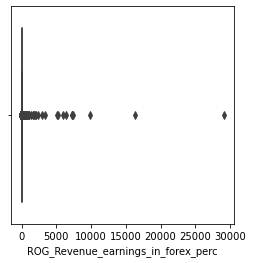

Description of ROG_Revenue_expenses_in_forex_perc
----------------------------------------------------------------------------
count     3586.00
mean       364.86
std      15233.64
min       -100.00
25%          0.00
50%          0.00
75%          0.00
max     894591.69
Name: ROG_Revenue_expenses_in_forex_perc, dtype: float64 Distribution of ROG_Revenue_expenses_in_forex_perc
----------------------------------------------------------------------------


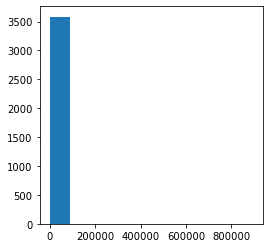

BoxPlot of ROG_Revenue_expenses_in_forex_perc
----------------------------------------------------------------------------


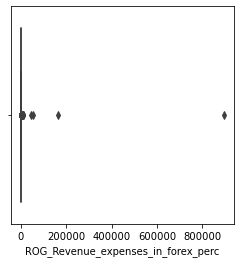

Description of ROG_Market_Capitalisation_perc
----------------------------------------------------------------------------
count    3586.00
mean       63.68
std      1047.93
min       -98.05
25%         0.00
50%         0.00
75%        47.52
max     61865.26
Name: ROG_Market_Capitalisation_perc, dtype: float64 Distribution of ROG_Market_Capitalisation_perc
----------------------------------------------------------------------------


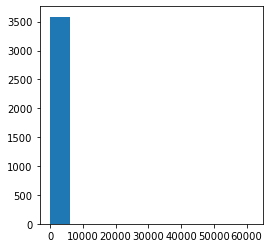

BoxPlot of ROG_Market_Capitalisation_perc
----------------------------------------------------------------------------


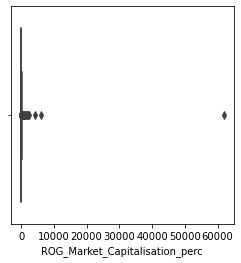

Description of Current_Ratio_Latest_
----------------------------------------------------------------------------
count   3586.00
mean      12.05
std      108.40
min        0.00
25%        0.88
50%        1.36
75%        2.77
max     4813.00
Name: Current_Ratio_Latest_, dtype: float64 Distribution of Current_Ratio_Latest_
----------------------------------------------------------------------------


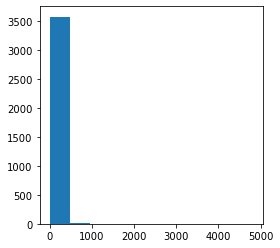

BoxPlot of Current_Ratio_Latest_
----------------------------------------------------------------------------


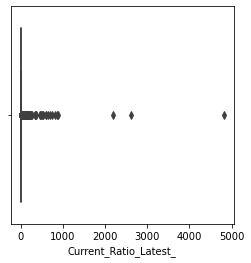

Description of Fixed_Assets_Ratio_Latest_
----------------------------------------------------------------------------
count    3586.00
mean       51.53
std       681.06
min         0.00
25%         0.27
50%         1.56
75%         4.75
max     22172.00
Name: Fixed_Assets_Ratio_Latest_, dtype: float64 Distribution of Fixed_Assets_Ratio_Latest_
----------------------------------------------------------------------------


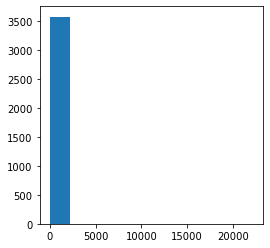

BoxPlot of Fixed_Assets_Ratio_Latest_
----------------------------------------------------------------------------


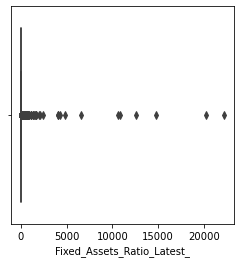

Description of Inventory_Ratio_Latest_
----------------------------------------------------------------------------
count    3586.00
mean       38.15
std       458.61
min         0.00
25%         0.00
50%         3.56
75%         8.94
max     15472.00
Name: Inventory_Ratio_Latest_, dtype: float64 Distribution of Inventory_Ratio_Latest_
----------------------------------------------------------------------------


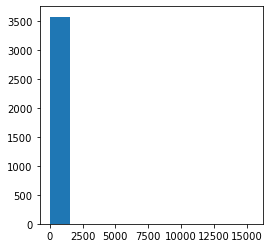

BoxPlot of Inventory_Ratio_Latest_
----------------------------------------------------------------------------


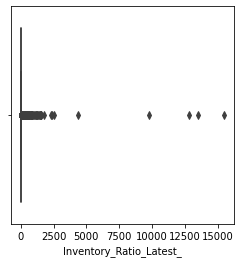

Description of Debtors_Ratio_Latest_
----------------------------------------------------------------------------
count    3586.00
mean       33.02
std       489.50
min         0.00
25%         0.42
50%         3.82
75%         8.54
max     22992.67
Name: Debtors_Ratio_Latest_, dtype: float64 Distribution of Debtors_Ratio_Latest_
----------------------------------------------------------------------------


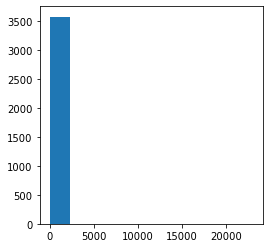

BoxPlot of Debtors_Ratio_Latest_
----------------------------------------------------------------------------


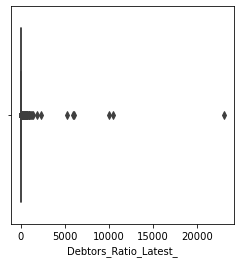

Description of Total_Asset_Turnover_Ratio_Latest_
----------------------------------------------------------------------------
count   3586.00
mean       1.24
std        2.67
min        0.00
25%        0.07
50%        0.60
75%        1.55
max       57.75
Name: Total_Asset_Turnover_Ratio_Latest_, dtype: float64 Distribution of Total_Asset_Turnover_Ratio_Latest_
----------------------------------------------------------------------------


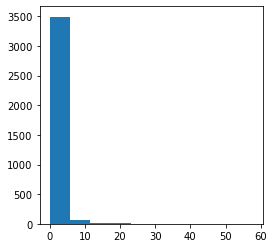

BoxPlot of Total_Asset_Turnover_Ratio_Latest_
----------------------------------------------------------------------------


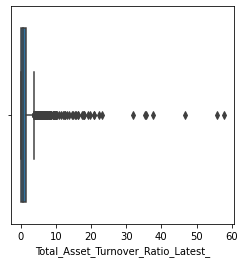

Description of Interest_Cover_Ratio_Latest_
----------------------------------------------------------------------------
count    3586.00
mean       16.38
std       351.69
min     -5450.00
25%         0.00
50%         1.08
75%         3.73
max     18639.40
Name: Interest_Cover_Ratio_Latest_, dtype: float64 Distribution of Interest_Cover_Ratio_Latest_
----------------------------------------------------------------------------


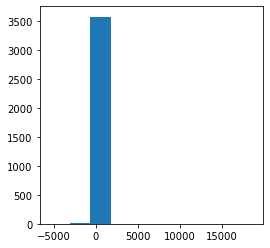

BoxPlot of Interest_Cover_Ratio_Latest_
----------------------------------------------------------------------------


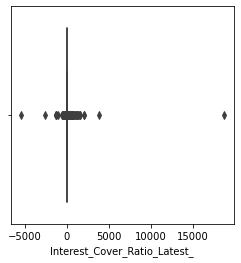

Description of PBIDTM_perc_Latest_
----------------------------------------------------------------------------
count     3586.00
mean       -51.15
std       1794.88
min     -78870.45
25%          0.00
50%          8.07
75%         18.99
max      19233.33
Name: PBIDTM_perc_Latest_, dtype: float64 Distribution of PBIDTM_perc_Latest_
----------------------------------------------------------------------------


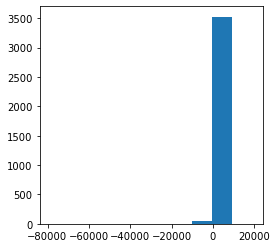

BoxPlot of PBIDTM_perc_Latest_
----------------------------------------------------------------------------


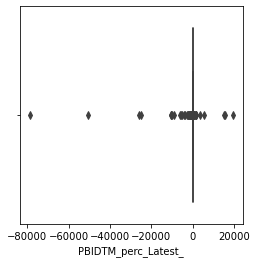

Description of PBITM_perc_Latest_
----------------------------------------------------------------------------
count      3586.00
mean       -109.18
std        3057.21
min     -141600.00
25%           0.00
50%           5.23
75%          14.29
max       19195.70
Name: PBITM_perc_Latest_, dtype: float64 Distribution of PBITM_perc_Latest_
----------------------------------------------------------------------------


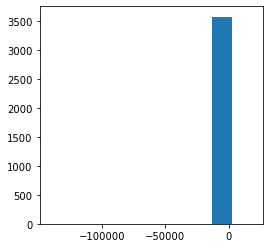

BoxPlot of PBITM_perc_Latest_
----------------------------------------------------------------------------


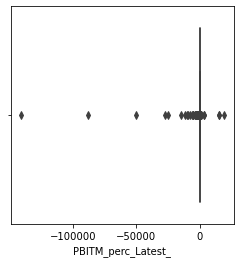

Description of PBDTM_perc_Latest_
----------------------------------------------------------------------------
count      3586.00
mean       -311.48
std       10920.07
min     -590500.00
25%           0.00
50%           4.69
75%          14.10
max       15640.00
Name: PBDTM_perc_Latest_, dtype: float64 Distribution of PBDTM_perc_Latest_
----------------------------------------------------------------------------


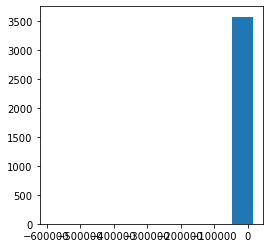

BoxPlot of PBDTM_perc_Latest_
----------------------------------------------------------------------------


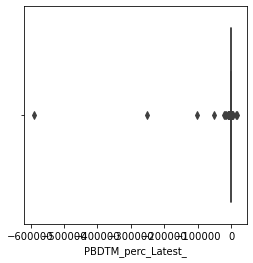

Description of CPM_perc_Latest_
----------------------------------------------------------------------------
count      3586.00
mean       -306.92
std       10674.66
min     -572000.00
25%           0.00
50%           3.89
75%          11.39
max       15640.00
Name: CPM_perc_Latest_, dtype: float64 Distribution of CPM_perc_Latest_
----------------------------------------------------------------------------


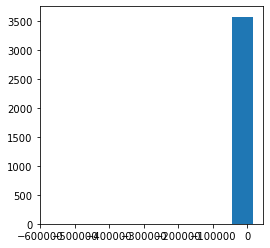

BoxPlot of CPM_perc_Latest_
----------------------------------------------------------------------------


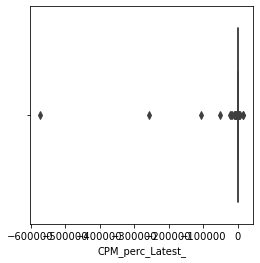

Description of APATM_perc_Latest_
----------------------------------------------------------------------------
count      3586.00
mean       -364.95
std       12498.31
min     -688600.00
25%           0.00
50%           1.59
75%           7.41
max       15266.67
Name: APATM_perc_Latest_, dtype: float64 Distribution of APATM_perc_Latest_
----------------------------------------------------------------------------


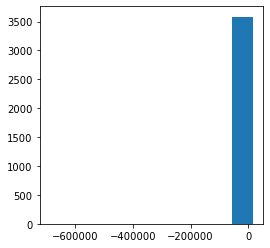

BoxPlot of APATM_perc_Latest_
----------------------------------------------------------------------------


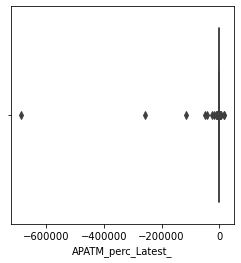

Description of Debtors_Velocity_Days
----------------------------------------------------------------------------
count     3586.00
mean       603.89
std      10636.76
min          0.00
25%          8.00
50%         49.00
75%        106.00
max     514721.00
Name: Debtors_Velocity_Days, dtype: float64 Distribution of Debtors_Velocity_Days
----------------------------------------------------------------------------


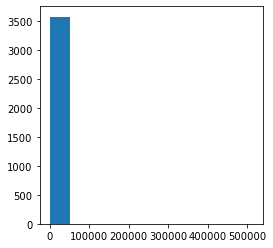

BoxPlot of Debtors_Velocity_Days
----------------------------------------------------------------------------


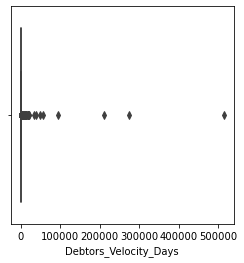

Description of Creditors_Velocity_Days
----------------------------------------------------------------------------
count      3586.00
mean       2057.85
std       54169.48
min           0.00
25%           8.00
50%          39.00
75%          89.00
max     2034145.00
Name: Creditors_Velocity_Days, dtype: float64 Distribution of Creditors_Velocity_Days
----------------------------------------------------------------------------


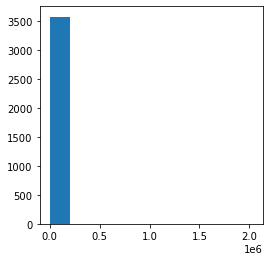

BoxPlot of Creditors_Velocity_Days
----------------------------------------------------------------------------


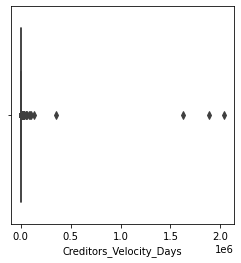

Description of Inventory_Velocity_Days
----------------------------------------------------------------------------
count   3586.00
mean      79.48
std      136.12
min     -199.00
25%        0.00
50%       37.00
75%       96.00
max      996.00
Name: Inventory_Velocity_Days, dtype: float64 Distribution of Inventory_Velocity_Days
----------------------------------------------------------------------------


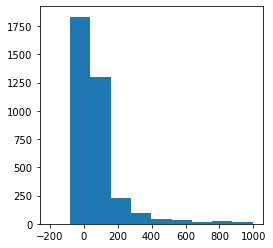

BoxPlot of Inventory_Velocity_Days
----------------------------------------------------------------------------


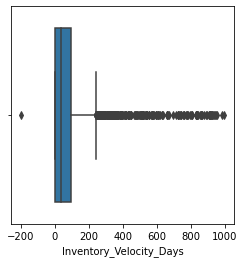

Description of Value_of_Output_to_Total_Assets
----------------------------------------------------------------------------
count   3586.00
mean       0.82
std        1.20
min       -0.33
25%        0.07
50%        0.48
75%        1.16
max       17.63
Name: Value_of_Output_to_Total_Assets, dtype: float64 Distribution of Value_of_Output_to_Total_Assets
----------------------------------------------------------------------------


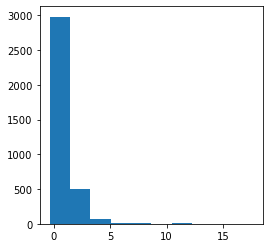

BoxPlot of Value_of_Output_to_Total_Assets
----------------------------------------------------------------------------


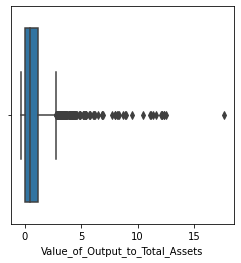

Description of Value_of_Output_to_Gross_Block
----------------------------------------------------------------------------
count    3586.00
mean       61.88
std       976.82
min       -61.00
25%         0.27
50%         1.53
75%         4.91
max     43404.00
Name: Value_of_Output_to_Gross_Block, dtype: float64 Distribution of Value_of_Output_to_Gross_Block
----------------------------------------------------------------------------


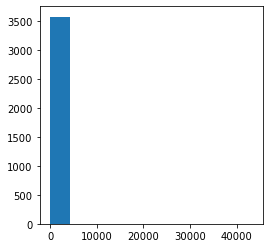

BoxPlot of Value_of_Output_to_Gross_Block
----------------------------------------------------------------------------


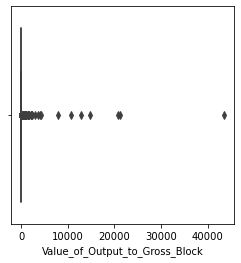

Description of default
----------------------------------------------------------------------------
count   3586.00
mean       0.11
std        0.31
min        0.00
25%        0.00
50%        0.00
75%        0.00
max        1.00
Name: default, dtype: float64 Distribution of default
----------------------------------------------------------------------------


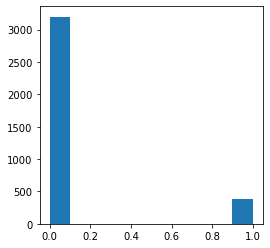

BoxPlot of default
----------------------------------------------------------------------------


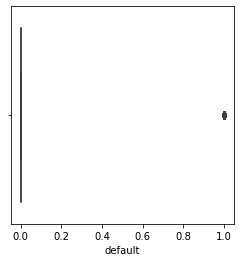

In [28]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

<AxesSubplot:>

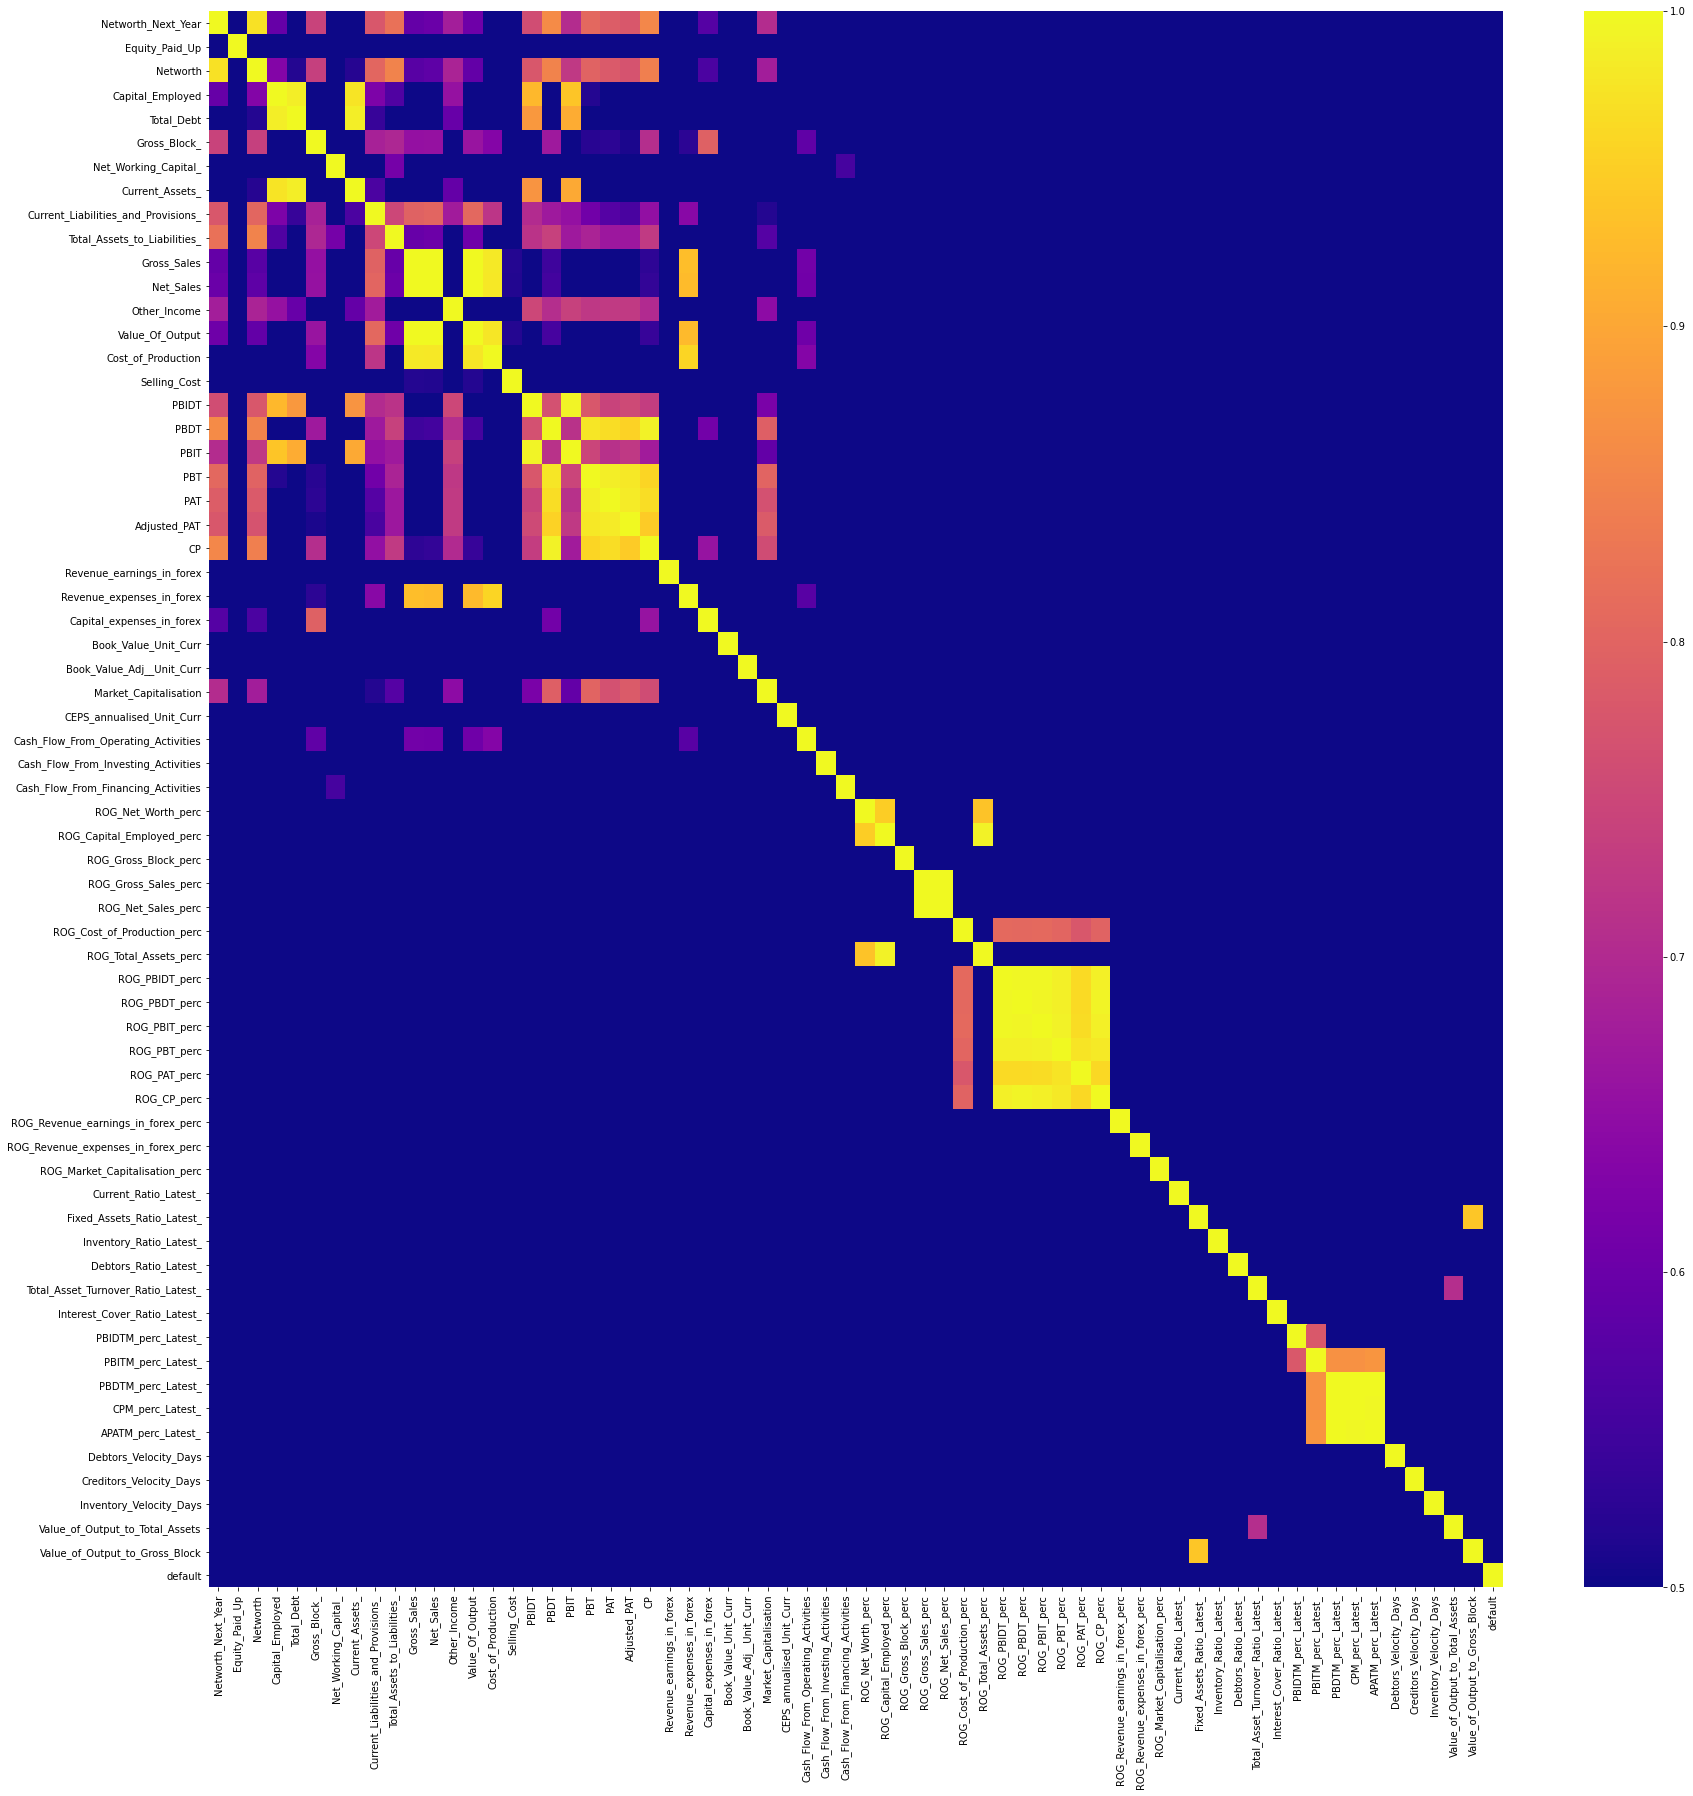

In [29]:
plt.figure(figsize=(29,29))
cor_matrix = Company.corr()
sns.heatmap(cor_matrix, cmap = 'plasma' , vmin = 0.5, vmax = 1)
#plt.show()

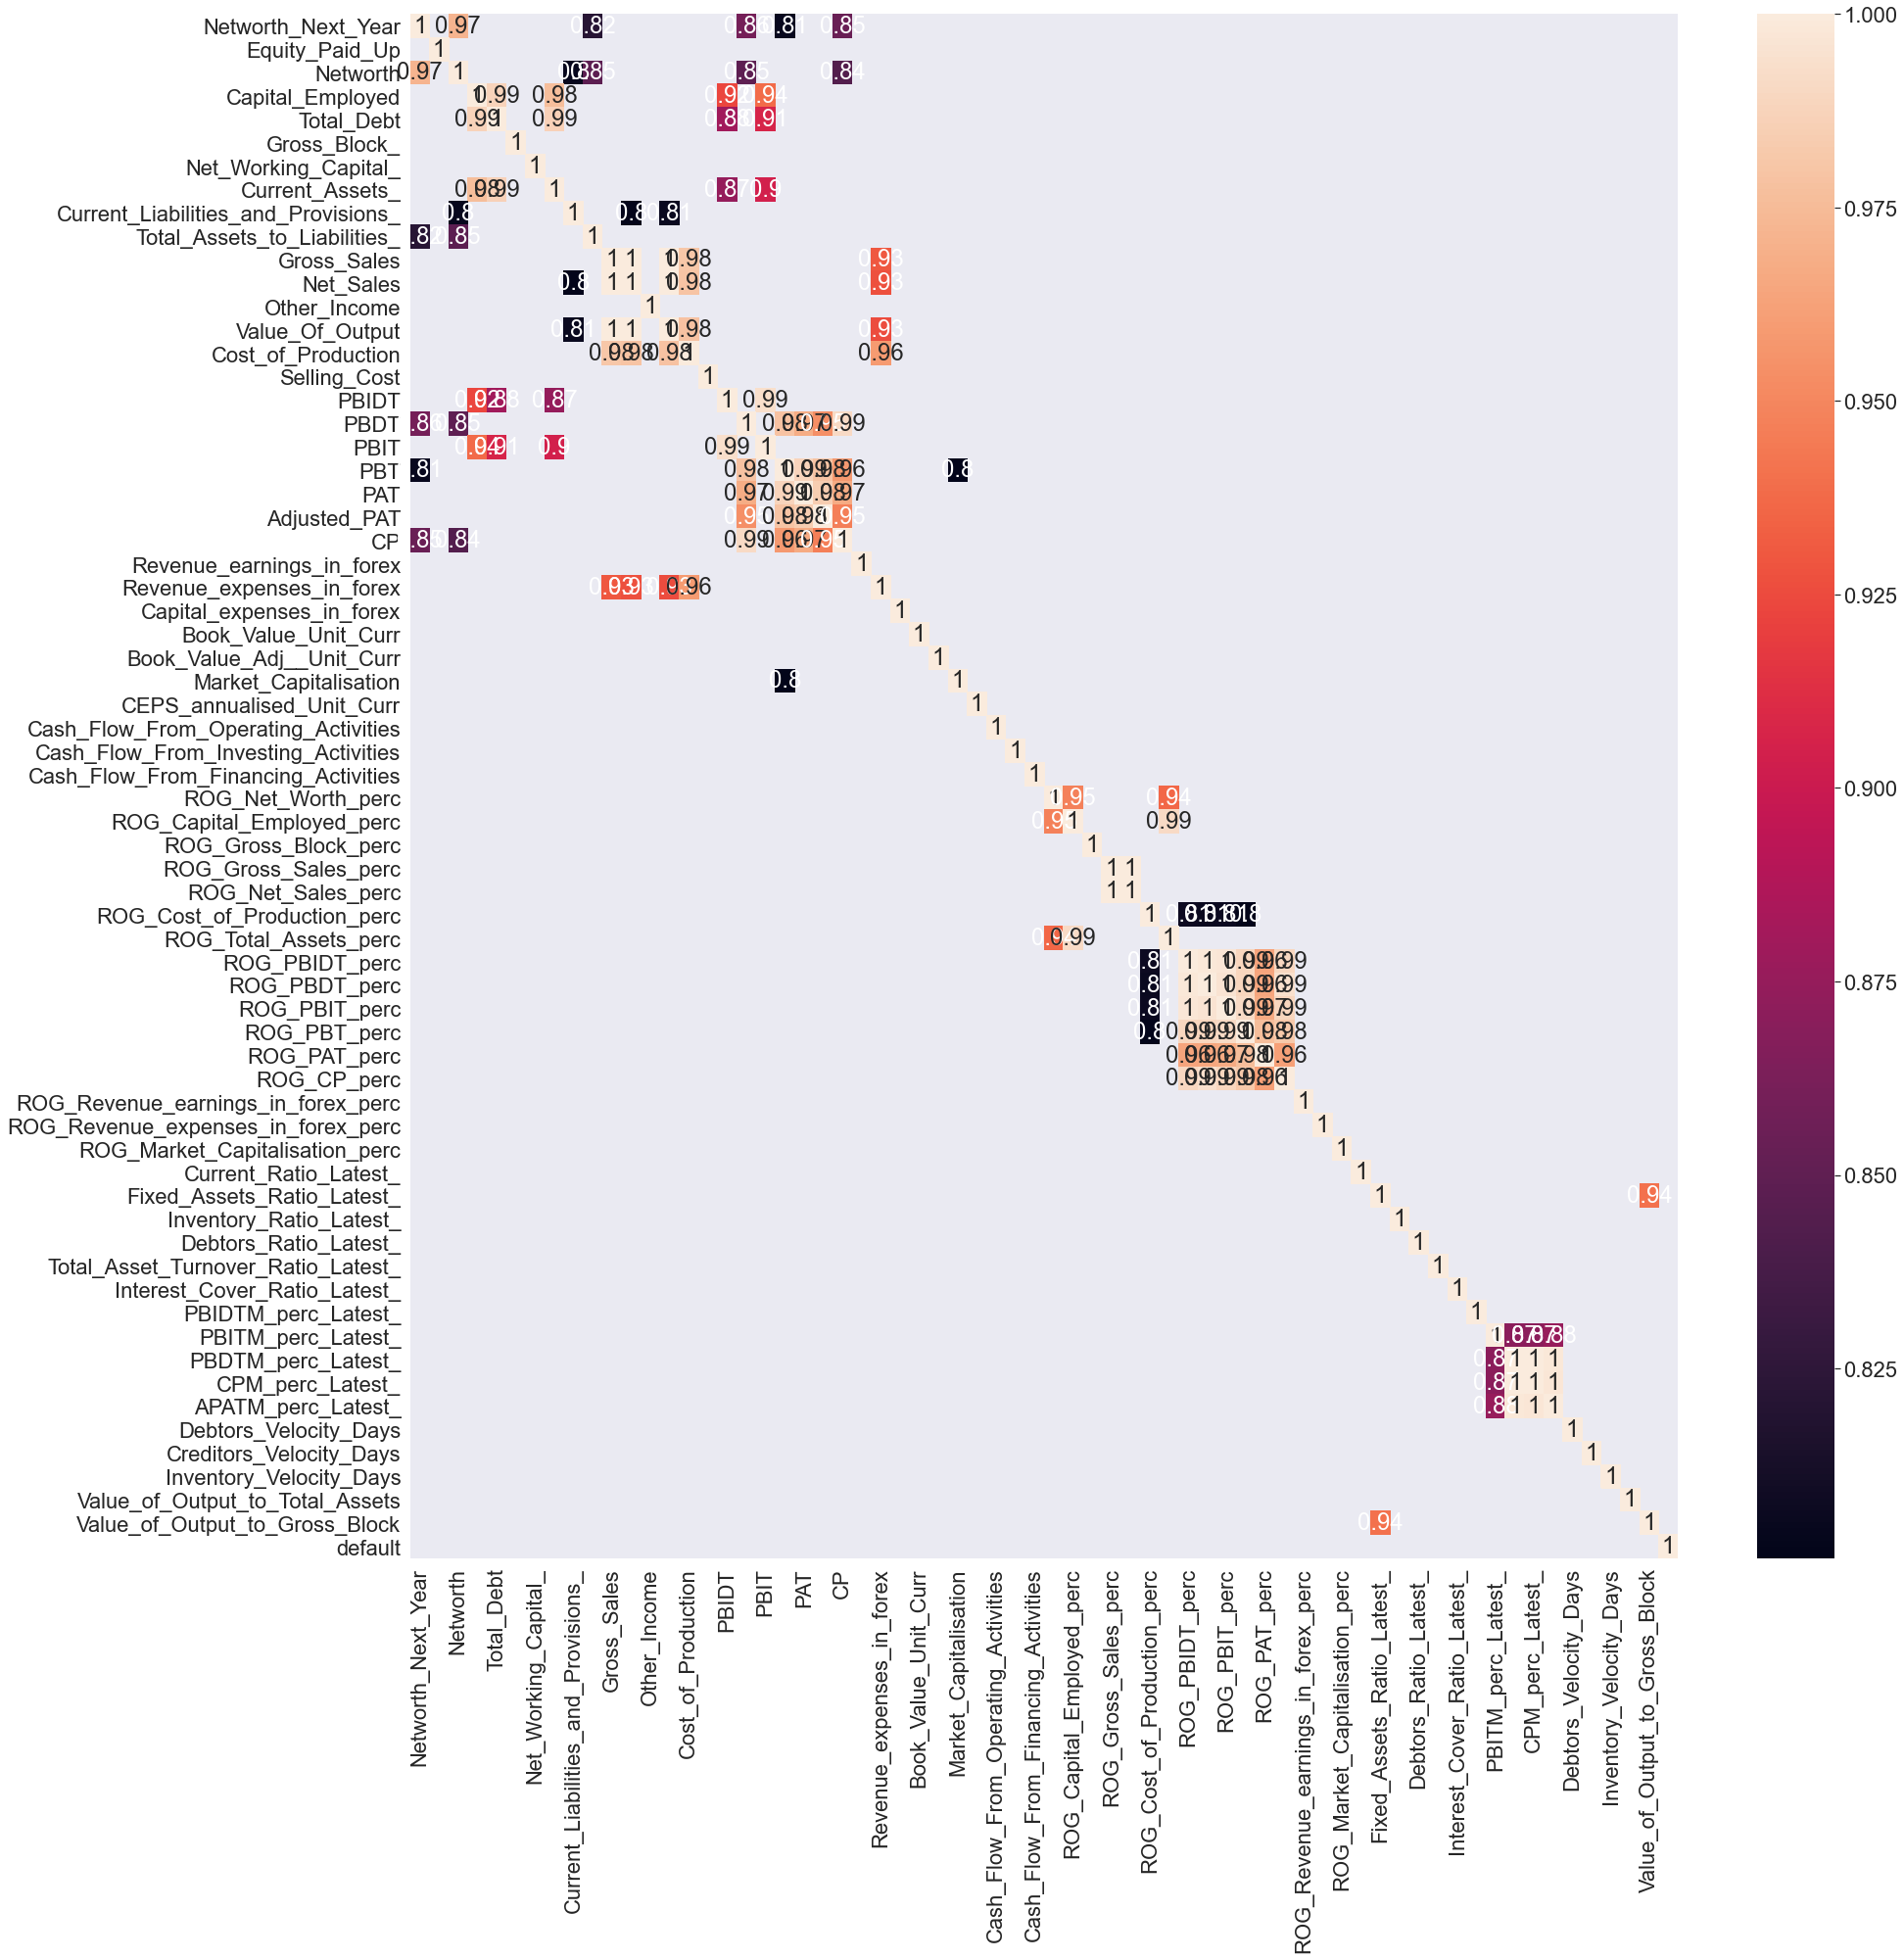

In [30]:
#calculate column correlations and make a seaborn heatmap - Before standardisation
corr = Company.corr()
kot = corr[corr>=.8]
plt.figure(figsize=(29,29))
#p.set(font_scale=2)
# setting the size of figure to 12 by 10
#p=sns.heatmap(kot, annot=True,square=True,annot_kws={'size':16})
#sns.color_palette("light:#5A9", as_cmap=True)
sns.set(font_scale=2)
heat_map = sns.heatmap(kot, annot=True)
plt.show()


<AxesSubplot:>

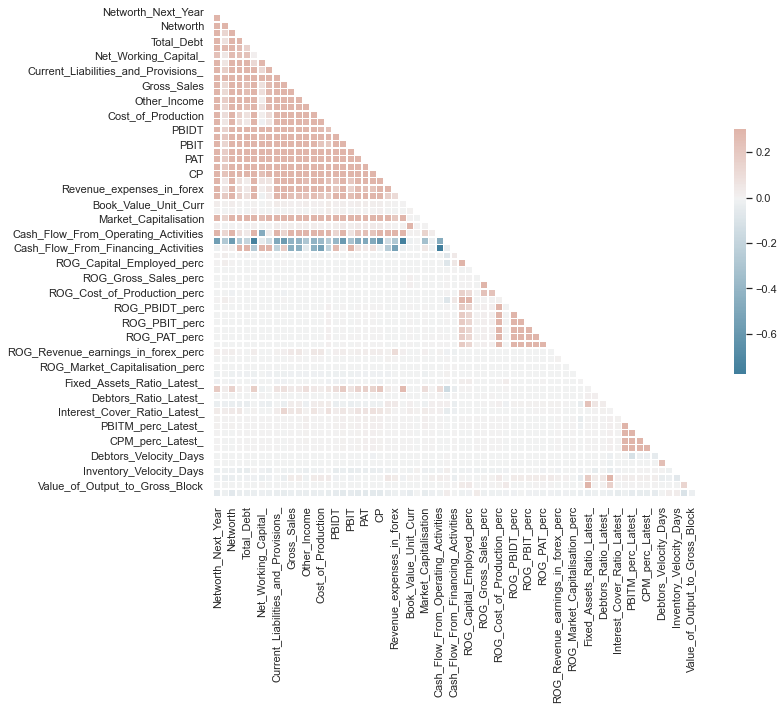

In [31]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Generate a large random dataset
#rs = np.random.RandomState(33)
#d = pd.DataFrame(data=rs.normal(size=(100, 26)),
#                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = Company.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Text(0.5, 1.0, 'Important!')

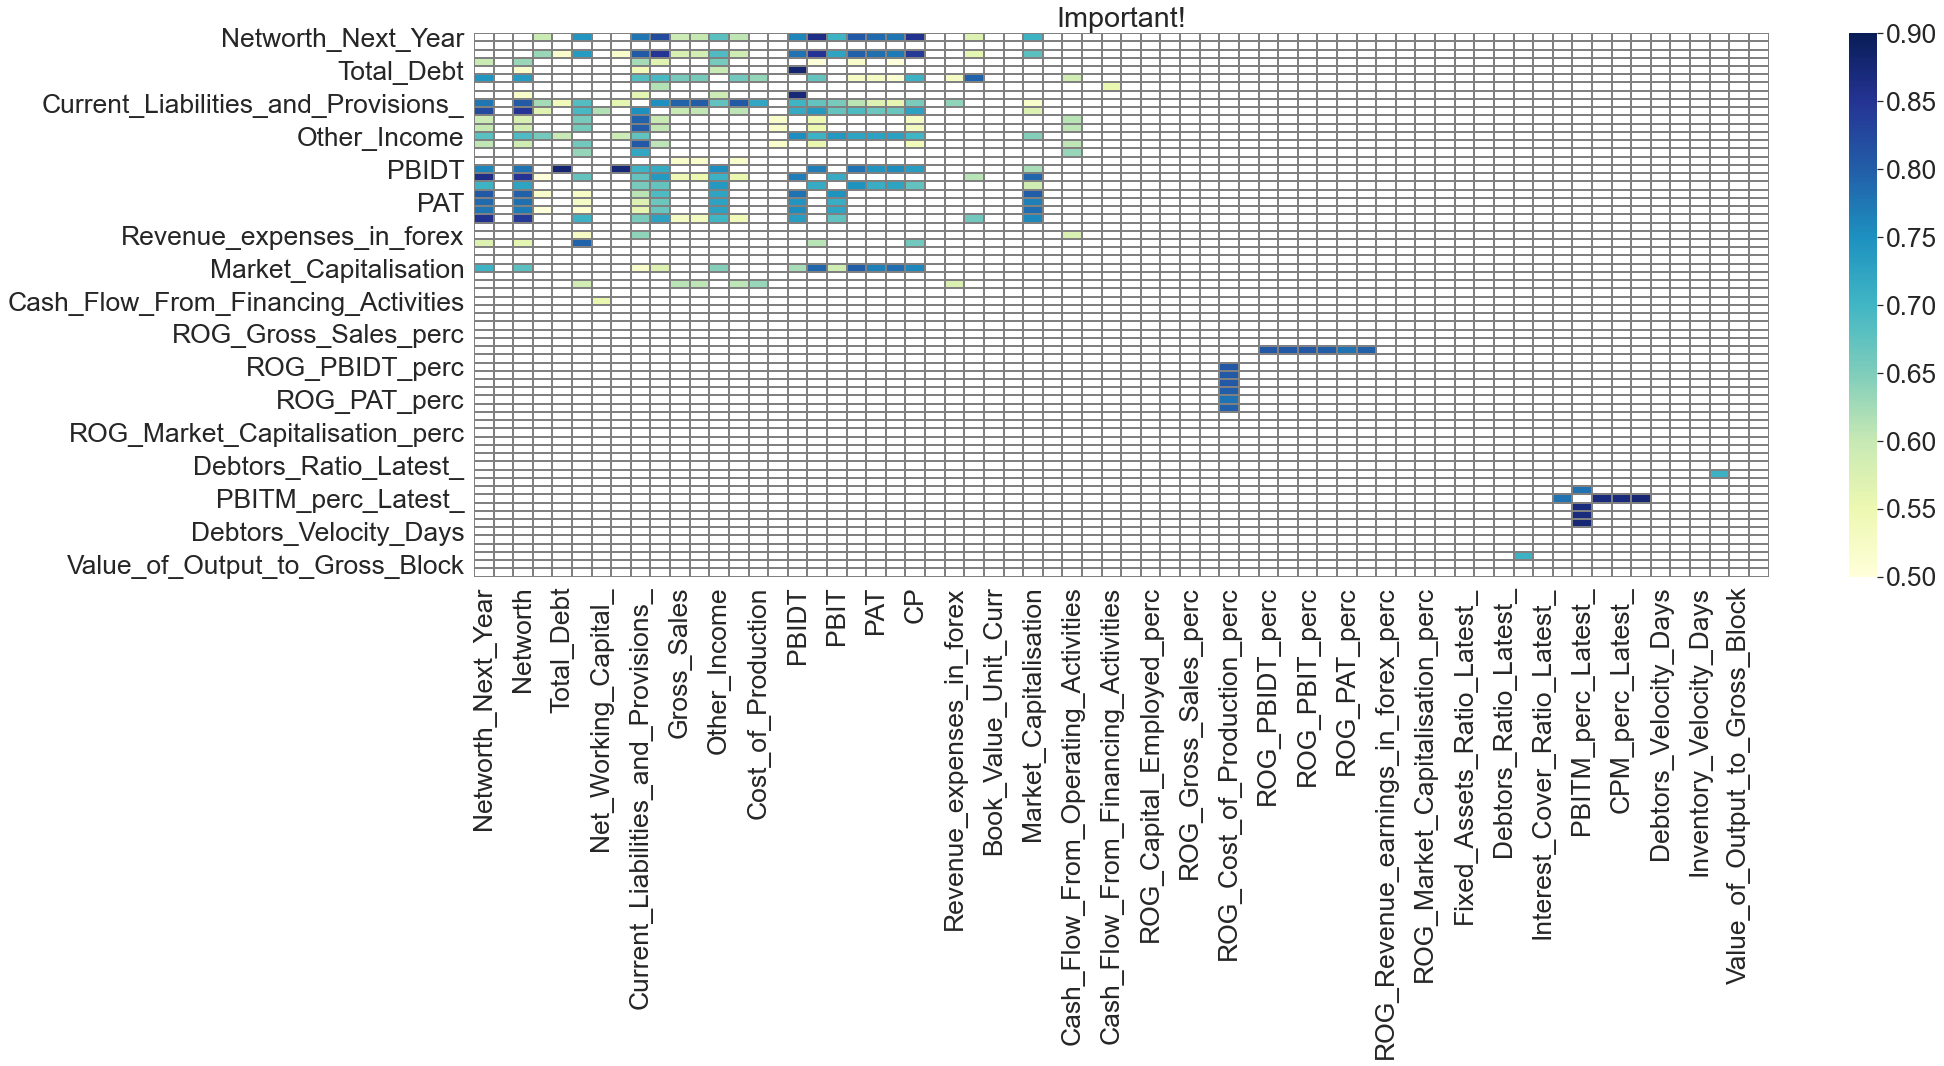

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from copy import copy
import seaborn as sns

#labels = list("ABCDE")
#semi-random data
#np.random.seed(123)
#df = pd.DataFrame(np.random.randint(1, 100, (20, 5)))
#df.columns = labels
#df.A = df.B - df.D
#df.E = df.A + df.C

corr = Company.corr()
sns.set(font_scale=2.4)
plt.subplots(figsize=(29,10))

#define the cmap with clipping values
my_cmap = copy(plt.cm.YlGnBu)
my_cmap.set_over("white")
my_cmap.set_under("white")

g = sns.heatmap(corr,
#    xticklabels=labels,
#    yticklabels=labels,
    vmin=0.5,
    vmax=0.9,
    cmap=my_cmap,
    linewidths=1.0,
    linecolor="grey")

#g.set_xticklabels(labels, rotation=60)
g.set_title("Important!")

In [33]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load dataset
#df = sns.load_dataset('iris')

# Convert categorical values to numeric
#label_encoder = LabelEncoder()
#df['species'] = label_encoder.fit_transform(df['species'])

# Create correlation matrix
corr_mat = Company.corr(method='pearson')

# Convert correlation matrix to 1-D Series and sort
sorted_mat = corr_mat.unstack().sort_values(ascending=False)

print(sorted_mat)


Networth_Next_Year                   Networth_Next_Year                     1.00
ROG_Net_Worth_perc                   ROG_Net_Worth_perc                     1.00
Cash_Flow_From_Investing_Activities  Cash_Flow_From_Investing_Activities    1.00
Cash_Flow_From_Operating_Activities  Cash_Flow_From_Operating_Activities    1.00
CEPS_annualised_Unit_Curr            CEPS_annualised_Unit_Curr              1.00
Market_Capitalisation                Market_Capitalisation                  1.00
Book_Value_Adj__Unit_Curr            Book_Value_Adj__Unit_Curr              1.00
Book_Value_Unit_Curr                 Book_Value_Unit_Curr                   1.00
Capital_expenses_in_forex            Capital_expenses_in_forex              1.00
Revenue_expenses_in_forex            Revenue_expenses_in_forex              1.00
Revenue_earnings_in_forex            Revenue_earnings_in_forex              1.00
CP                                   CP                                     1.00
Adjusted_PAT                

In [34]:
#sns.pairplot(Company)
#plt.show()

In [35]:
Q1 = Company.quantile(0.25)
Q3 = Company.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

In [36]:
((Company > UL) | (Company < LL)).sum()

Networth_Next_Year                      676
Equity_Paid_Up                          448
Networth                                650
Capital_Employed                        596
Total_Debt                              583
Gross_Block_                            540
Net_Working_Capital_                    625
Current_Assets_                         577
Current_Liabilities_and_Provisions_     581
Total_Assets_to_Liabilities_            574
Gross_Sales                             554
Net_Sales                               556
Other_Income                            603
Value_Of_Output                         559
Cost_of_Production                      560
Selling_Cost                            605
PBIDT                                   671
PBDT                                    815
PBIT                                    720
PBT                                     941
PAT                                     959
Adjusted_PAT                            954
CP                              

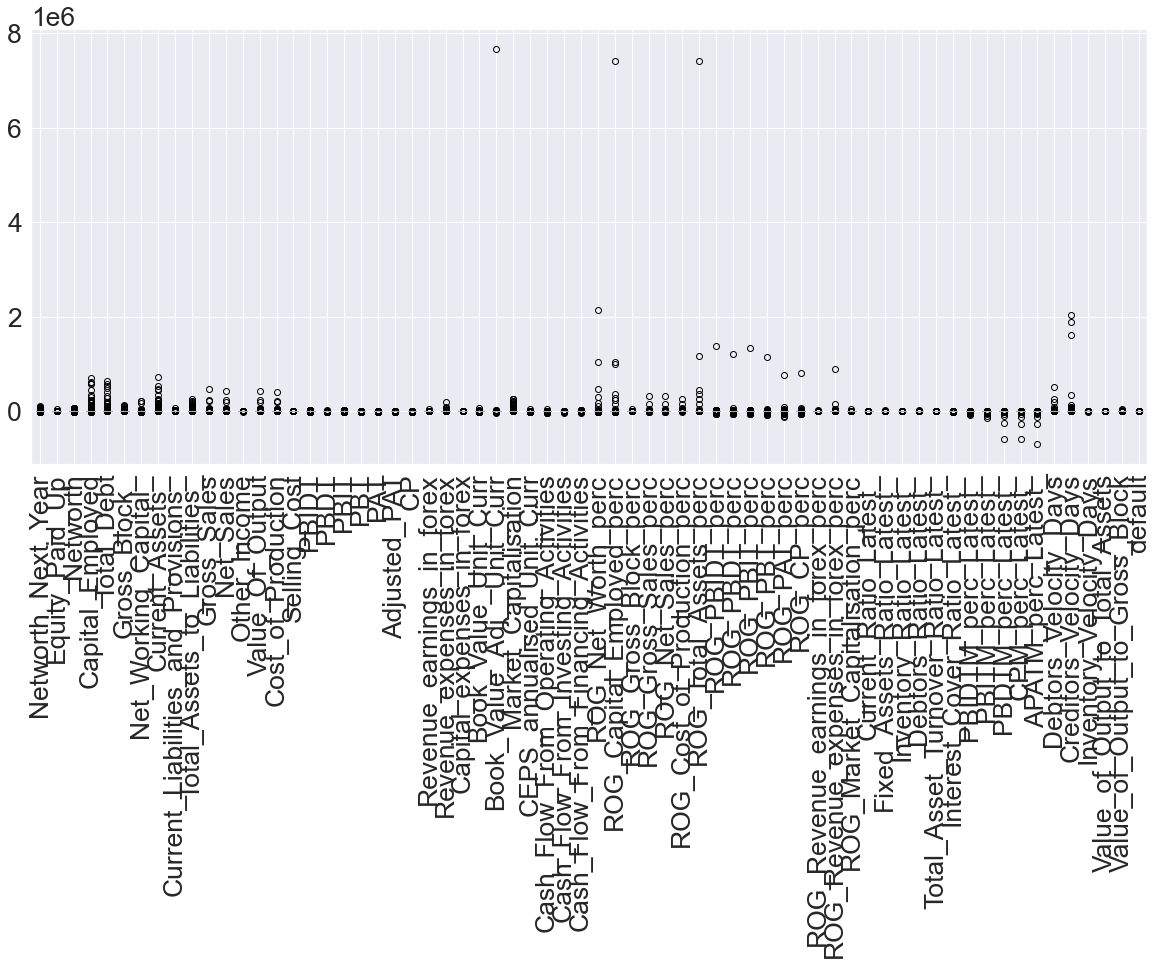

In [37]:
Company.boxplot(figsize=(20,8))
plt.xticks(rotation=90)
plt.show()

In [38]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range


In [39]:
Company.columns

Index(['Networth_Next_Year', 'Equity_Paid_Up', 'Networth', 'Capital_Employed',
       'Total_Debt', 'Gross_Block_', 'Net_Working_Capital_', 'Current_Assets_',
       'Current_Liabilities_and_Provisions_', 'Total_Assets_to_Liabilities_',
       'Gross_Sales', 'Net_Sales', 'Other_Income', 'Value_Of_Output',
       'Cost_of_Production', 'Selling_Cost', 'PBIDT', 'PBDT', 'PBIT', 'PBT',
       'PAT', 'Adjusted_PAT', 'CP', 'Revenue_earnings_in_forex',
       'Revenue_expenses_in_forex', 'Capital_expenses_in_forex',
       'Book_Value_Unit_Curr', 'Book_Value_Adj__Unit_Curr',
       'Market_Capitalisation', 'CEPS_annualised_Unit_Curr',
       'Cash_Flow_From_Operating_Activities',
       'Cash_Flow_From_Investing_Activities',
       'Cash_Flow_From_Financing_Activities', 'ROG_Net_Worth_perc',
       'ROG_Capital_Employed_perc', 'ROG_Gross_Block_perc',
       'ROG_Gross_Sales_perc', 'ROG_Net_Sales_perc',
       'ROG_Cost_of_Production_perc', 'ROG_Total_Assets_perc',
       'ROG_PBIDT_perc', 'ROG

In [40]:
outlier  = Company.iloc[:,0:65]


In [41]:
outlier.head()

,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block_,Net_Working_Capital_,Current_Assets_,Current_Liabilities_and_Provisions_,Total_Assets_to_Liabilities_,Gross_Sales,Net_Sales,Other_Income,Value_Of_Output,Cost_of_Production,Selling_Cost,PBIDT,PBDT,PBIT,PBT,PAT,Adjusted_PAT,CP,Revenue_earnings_in_forex,Revenue_expenses_in_forex,Capital_expenses_in_forex,Book_Value_Unit_Curr,Book_Value_Adj__Unit_Curr,Market_Capitalisation,CEPS_annualised_Unit_Curr,Cash_Flow_From_Operating_Activities,Cash_Flow_From_Investing_Activities,Cash_Flow_From_Financing_Activities,ROG_Net_Worth_perc,ROG_Capital_Employed_perc,ROG_Gross_Block_perc,ROG_Gross_Sales_perc,ROG_Net_Sales_perc,ROG_Cost_of_Production_perc,ROG_Total_Assets_perc,ROG_PBIDT_perc,ROG_PBDT_perc,ROG_PBIT_perc,ROG_PBT_perc,ROG_PAT_perc,ROG_CP_perc,ROG_Revenue_earnings_in_forex_perc,ROG_Revenue_expenses_in_forex_perc,ROG_Market_Capitalisation_perc,Current_Ratio_Latest_,Fixed_Assets_Ratio_Latest_,Inventory_Ratio_Latest_,Debtors_Ratio_Latest_,Total_Asset_Turnover_Ratio_Latest_,Interest_Cover_Ratio_Latest_,PBIDTM_perc_Latest_,PBITM_perc_Latest_,PBDTM_perc_Latest_,CPM_perc_Latest_,APATM_perc_Latest_,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block
0,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,1116.85,109.60,0.00,0.00,7.60,-0.07,137.67,0.00,-179.06,-926.52,-185.53,-932.99,-932.99,-937.85,-926.52,0.00,0.00,0.00,-167.58,-167.58,0.00,-22.09,-102.47,1.46,92.58,-15.31,-20.76,-9.75,0.00,0.00,1.38,-25.75,5.23,-19.29,4.43,-19.33,-19.33,-19.29,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,-0.20,0.00,0.00,0.00,0.00,0.00,0.00,0.00,45.00,0.00,0.00
1,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,1585.74,6043.94,2892.73,2892.73,46.27,2900.71,2572.46,40.51,646.46,-4.32,35.53,-615.25,-615.25,-617.14,-4.32,6.35,143.42,141.17,-15.18,-15.18,1544.39,-0.02,635.91,-785.00,176.93,-26.15,6.30,3.17,5.92,5.92,13.16,6.66,5.24,-108.77,614.89,-9.85,-9.85,-108.77,1.93,34.00,6.61,0.08,0.25,804.44,10.35,0.30,-0.84,-10.30,-39.74,-57.74,-57.74,-87.18,29.00,101.00,2.00,0.31,0.24
2,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,4601.39,12316.07,392.13,392.13,9.55,301.16,408.51,54.83,-281.92,-1086.71,-381.10,-1185.89,-897.70,-873.39,-798.52,0.00,86.36,2.27,94.14,94.14,1220.81,-148.31,-873.40,-458.27,1187.51,-61.86,15.66,-2.07,-75.87,-75.87,-69.93,-0.78,-169.69,-431.68,-221.85,-300.41,-350.43,-642.67,-100.00,-81.21,-6.31,1.06,0.03,0.01,0.42,0.00,-2.21,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97.00,558.00,0.00,-0.03,-0.26
3,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,3646.54,6000.42,1354.39,1354.39,223.85,1350.14,1326.99,3.34,-213.01,-677.57,-336.73,-801.29,-801.29,-770.18,-677.57,0.89,28.88,0.00,-39.64,-39.64,194.27,-43.08,324.47,17.31,-412.55,-450.67,-40.84,-1.80,8.33,8.33,16.59,-10.12,-203.84,-102.72,-455.28,-80.23,-70.57,-88.52,-52.91,-33.85,-13.94,0.09,5.08,411.15,9.26,0.00,-0.16,-3.33,-7.21,-48.13,-47.70,-51.58,93.00,63.00,2.00,0.24,1.90
4,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,2849.58,7524.91,38.72,38.72,9.82,38.72,186.29,1.97,-647.86,-944.42,-710.13,-1006.69,-864.58,-327.77,-802.31,0.00,15.62,0.00,-212.89,-212.89,113.68,-159.50,-191.54,61.34,143.65,-559.83,-11.76,0.34,-80.61,-80.61,-48.80,-5.81,-40.07,3.28,-38.72,1.87,-2.59,-1.13,-100.00,-91.17,-12.91,0.50,0.05,0.02,1.28,0.01,-0.73,-295.55,-400.55,-845.88,379.79,274.79,3887.00,346.00,0.00,0.01,0.05


In [42]:
for column in outlier.columns:
    lr,ur=remove_outlier(outlier[column])
    outlier[column]=np.where(outlier[column]>ur,ur,outlier[column])
    outlier[column]=np.where(outlier[column]<lr,lr,outlier[column])

In [43]:
#Company = outlier

In [44]:
Company.head()

,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block_,Net_Working_Capital_,Current_Assets_,Current_Liabilities_and_Provisions_,Total_Assets_to_Liabilities_,Gross_Sales,Net_Sales,Other_Income,Value_Of_Output,Cost_of_Production,Selling_Cost,PBIDT,PBDT,PBIT,PBT,PAT,Adjusted_PAT,CP,Revenue_earnings_in_forex,Revenue_expenses_in_forex,Capital_expenses_in_forex,Book_Value_Unit_Curr,Book_Value_Adj__Unit_Curr,Market_Capitalisation,CEPS_annualised_Unit_Curr,Cash_Flow_From_Operating_Activities,Cash_Flow_From_Investing_Activities,Cash_Flow_From_Financing_Activities,ROG_Net_Worth_perc,ROG_Capital_Employed_perc,ROG_Gross_Block_perc,ROG_Gross_Sales_perc,ROG_Net_Sales_perc,ROG_Cost_of_Production_perc,ROG_Total_Assets_perc,ROG_PBIDT_perc,ROG_PBDT_perc,ROG_PBIT_perc,ROG_PBT_perc,ROG_PAT_perc,ROG_CP_perc,ROG_Revenue_earnings_in_forex_perc,ROG_Revenue_expenses_in_forex_perc,ROG_Market_Capitalisation_perc,Current_Ratio_Latest_,Fixed_Assets_Ratio_Latest_,Inventory_Ratio_Latest_,Debtors_Ratio_Latest_,Total_Asset_Turnover_Ratio_Latest_,Interest_Cover_Ratio_Latest_,PBIDTM_perc_Latest_,PBITM_perc_Latest_,PBDTM_perc_Latest_,CPM_perc_Latest_,APATM_perc_Latest_,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block,default
0,-175.74,43.17,-166.22,-320.90,180.83,328.88,-89.41,40.50,163.03,109.60,0.00,0.00,7.60,-0.07,137.67,0.00,-35.19,-19.42,-25.00,-11.28,-8.46,-8.24,-16.37,0.00,0.00,0.00,-87.59,-72.29,0.00,-13.16,-19.74,1.46,9.91,-15.31,-20.76,-9.75,0.00,0.00,1.38,-25.75,5.23,-19.29,4.43,-19.33,-19.33,-19.29,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,-0.20,0.00,0.00,0.00,0.00,0.00,0.00,0.00,45.00,0.00,0.00,1.00
1,-175.74,43.17,-166.22,555.11,180.83,328.88,-89.41,332.19,163.03,760.52,603.46,583.94,9.06,587.48,472.47,9.71,58.75,-4.32,35.53,-11.28,-8.46,-8.24,-4.32,6.35,17.47,0.00,-15.18,-15.18,278.64,-0.02,32.08,-12.97,9.91,-20.76,6.30,3.17,5.92,5.92,13.16,6.66,5.24,-108.77,172.38,-9.85,-9.85,-108.77,0.00,0.00,6.61,0.08,0.25,22.35,10.35,0.30,-0.84,-10.30,-21.43,-21.15,-17.08,-11.11,29.00,101.00,2.00,0.31,0.24,1.00
2,-175.74,43.17,287.41,555.11,180.83,328.88,151.52,332.19,163.03,760.52,392.13,392.13,9.06,301.16,408.51,9.71,-35.19,-19.42,-25.00,-11.28,-8.46,-8.24,-16.37,0.00,17.47,0.00,94.14,94.14,278.64,-13.16,-19.74,-12.97,9.91,-20.76,15.66,-2.07,-52.48,-52.64,-52.79,-0.78,-130.22,-155.87,-153.59,-196.02,-207.35,-153.12,0.00,0.00,-6.31,1.06,0.03,0.01,0.42,0.00,-2.21,-28.48,-21.43,-21.15,-17.08,-11.11,97.00,210.50,0.00,-0.03,-0.26,1.00
3,-175.74,43.17,-166.22,555.11,180.83,328.88,-89.41,332.19,163.03,760.52,603.46,583.94,9.06,587.48,472.47,3.34,-35.19,-19.42,-25.00,-11.28,-8.46,-8.24,-16.37,0.89,17.47,0.00,-39.64,-39.64,194.27,-13.16,32.08,7.98,-15.30,-20.76,-28.47,-1.80,8.33,8.33,16.59,-10.12,-130.22,-102.72,-153.59,-80.23,-70.57,-88.52,0.00,0.00,-13.94,0.09,5.08,22.35,9.26,0.00,-0.16,-3.33,-7.21,-21.15,-17.08,-11.11,93.00,63.00,2.00,0.24,1.90,1.00
4,-175.74,43.17,-166.22,555.11,180.83,328.88,151.52,332.19,163.03,760.52,38.72,38.72,9.06,38.72,186.29,1.97,-35.19,-19.42,-25.00,-11.28,-8.46,-8.24,-16.37,0.00,15.62,0.00,-87.59,-72.29,113.68,-13.16,-19.74,7.98,9.91,-20.76,-11.76,0.34,-52.48,-52.64,-48.80,-5.81,-40.07,3.28,-38.72,1.87,-2.59,-1.13,0.00,0.00,-12.91,0.50,0.05,0.02,1.28,0.01,-0.73,-28.48,-21.43,-21.15,28.47,18.52,253.00,210.50,0.00,0.01,0.05,1.00


In [45]:
Company['default'] = np.where((Company['Networth_Next_Year'] > 0), 0, 1)

In [46]:

Company['default'].value_counts()

0    3198
1     388
Name: default, dtype: int64

In [47]:

Company['default'].value_counts(normalize = True)

0   0.89
1   0.11
Name: default, dtype: float64

In [48]:
Company.columns

Index(['Networth_Next_Year', 'Equity_Paid_Up', 'Networth', 'Capital_Employed',
       'Total_Debt', 'Gross_Block_', 'Net_Working_Capital_', 'Current_Assets_',
       'Current_Liabilities_and_Provisions_', 'Total_Assets_to_Liabilities_',
       'Gross_Sales', 'Net_Sales', 'Other_Income', 'Value_Of_Output',
       'Cost_of_Production', 'Selling_Cost', 'PBIDT', 'PBDT', 'PBIT', 'PBT',
       'PAT', 'Adjusted_PAT', 'CP', 'Revenue_earnings_in_forex',
       'Revenue_expenses_in_forex', 'Capital_expenses_in_forex',
       'Book_Value_Unit_Curr', 'Book_Value_Adj__Unit_Curr',
       'Market_Capitalisation', 'CEPS_annualised_Unit_Curr',
       'Cash_Flow_From_Operating_Activities',
       'Cash_Flow_From_Investing_Activities',
       'Cash_Flow_From_Financing_Activities', 'ROG_Net_Worth_perc',
       'ROG_Capital_Employed_perc', 'ROG_Gross_Block_perc',
       'ROG_Gross_Sales_perc', 'ROG_Net_Sales_perc',
       'ROG_Cost_of_Production_perc', 'ROG_Total_Assets_perc',
       'ROG_PBIDT_perc', 'ROG

In [49]:
import statsmodels.formula.api as SM

In [50]:
from sklearn.feature_selection import VarianceThreshold

def variance_threshold_selector(data, threshold=0.5):
    # https://stackoverflow.com/a/39813304/1956309
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]

# min_variance = .9 * (1 - .9)  # You can play here with different values.
min_variance = 0.0001
low_variance = variance_threshold_selector(Company, min_variance) 
print('columns removed:')
Company.columns ^ low_variance.columns
Company.shape
Company.shape
X = low_variance

columns removed:


In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [52]:
X = Company.drop('default', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
11,Net_Sales,1700.16
10,Gross_Sales,961.37
13,Value_Of_Output,694.81
36,ROG_Gross_Sales_perc,541.83
37,ROG_Net_Sales_perc,541.33
17,PBDT,117.80
9,Total_Assets_to_Liabilities_,105.58
22,CP,104.50
20,PAT,76.88
19,PBT,75.64


# A rule of thumb for interpreting the variance inflation factor:
# 1 = not correlated.
# Between 1 and 5 = moderately correlated.
# Greater than 5 = highly correlated.

In [53]:

X = X.drop('Net_Sales', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
35,ROG_Gross_Sales_perc,526.28
36,ROG_Net_Sales_perc,525.34
10,Gross_Sales,416.68
12,Value_Of_Output,405.57
16,PBDT,117.79
9,Total_Assets_to_Liabilities_,104.94
21,CP,104.49
19,PAT,76.71
18,PBT,75.47
3,Capital_Employed,73.31


In [54]:
X = X.drop('ROG_Gross_Sales_perc', axis = 1)

calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
10,Gross_Sales,411.64
12,Value_Of_Output,400.97
16,PBDT,117.33
9,Total_Assets_to_Liabilities_,104.94
21,CP,104.15
19,PAT,76.57
18,PBT,75.42
3,Capital_Employed,73.30
13,Cost_of_Production,49.32
7,Current_Assets_,33.18


In [55]:

X = X.drop('Gross_Sales', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
15,PBDT,117.31
9,Total_Assets_to_Liabilities_,104.92
20,CP,104.13
18,PAT,76.53
17,PBT,75.29
3,Capital_Employed,73.30
11,Value_Of_Output,58.30
12,Cost_of_Production,47.20
7,Current_Assets_,33.17
55,CPM_perc_Latest_,32.95


In [56]:
X = X.drop('PBDT', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
9,Total_Assets_to_Liabilities_,104.83
3,Capital_Employed,73.20
17,PAT,67.35
11,Value_Of_Output,58.30
16,PBT,55.31
12,Cost_of_Production,47.18
7,Current_Assets_,33.15
54,CPM_perc_Latest_,32.94
51,PBIDTM_perc_Latest_,32.59
14,PBIDT,32.06


In [57]:
X = X.drop('Total_Assets_to_Liabilities_', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
16,PAT,67.32
10,Value_Of_Output,58.22
15,PBT,55.28
11,Cost_of_Production,46.98
53,CPM_perc_Latest_,32.94
50,PBIDTM_perc_Latest_,32.49
13,PBIDT,31.63
7,Current_Assets_,31.17
51,PBITM_perc_Latest_,30.19
14,PBIT,29.25


In [58]:
X = X.drop('PAT', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
10,Value_Of_Output,58.09
11,Cost_of_Production,46.96
52,CPM_perc_Latest_,32.94
49,PBIDTM_perc_Latest_,32.49
13,PBIDT,31.50
7,Current_Assets_,31.17
50,PBITM_perc_Latest_,30.18
14,PBIT,29.25
2,Networth,28.55
51,PBDTM_perc_Latest_,27.60


In [59]:
X = X.drop('Value_Of_Output', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
51,CPM_perc_Latest_,32.74
48,PBIDTM_perc_Latest_,32.21
7,Current_Assets_,31.12
12,PBIDT,30.47
49,PBITM_perc_Latest_,30.01
13,PBIT,29.24
2,Networth,28.54
50,PBDTM_perc_Latest_,27.59
34,ROG_PBDT_perc,24.38
3,Capital_Employed,24.02


In [60]:
X = X.drop('CPM_perc_Latest_', axis = 1)

calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
7,Current_Assets_,31.05
12,PBIDT,30.47
13,PBIT,29.24
2,Networth,28.54
48,PBIDTM_perc_Latest_,25.41
34,ROG_PBDT_perc,24.38
3,Capital_Employed,24.02
0,Networth_Next_Year,22.63
49,PBITM_perc_Latest_,21.98
14,PBT,21.67


In [61]:
X = X.drop('Current_Assets_', axis = 1)

calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
11,PBIDT,30.44
12,PBIT,29.22
2,Networth,28.38
47,PBIDTM_perc_Latest_,25.39
33,ROG_PBDT_perc,24.37
0,Networth_Next_Year,22.63
48,PBITM_perc_Latest_,21.97
13,PBT,21.61
3,Capital_Employed,21.44
35,ROG_PBT_perc,18.95


In [62]:
X = X.drop('PBIDT', axis = 1)

calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
2,Networth,28.12
46,PBIDTM_perc_Latest_,25.06
32,ROG_PBDT_perc,24.26
0,Networth_Next_Year,22.62
47,PBITM_perc_Latest_,21.82
3,Capital_Employed,21.43
12,PBT,21.18
34,ROG_PBT_perc,18.88
36,ROG_CP_perc,17.87
48,PBDTM_perc_Latest_,17.67


In [63]:
X = X.drop('Networth', axis = 1)

calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
45,PBIDTM_perc_Latest_,25.05
31,ROG_PBDT_perc,24.26
46,PBITM_perc_Latest_,21.82
11,PBT,21.07
2,Capital_Employed,18.90
33,ROG_PBT_perc,18.88
35,ROG_CP_perc,17.86
47,PBDTM_perc_Latest_,17.67
13,CP,17.43
17,Book_Value_Unit_Curr,17.37


In [64]:
X = X.drop('PBIDTM_perc_Latest_', axis = 1)

calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
31,ROG_PBDT_perc,24.25
11,PBT,21.07
33,ROG_PBT_perc,18.86
2,Capital_Employed,18.85
35,ROG_CP_perc,17.86
13,CP,17.43
17,Book_Value_Unit_Curr,17.37
30,ROG_PBIDT_perc,14.49
12,Adjusted_PAT,14.45
34,ROG_PAT_perc,14.13


In [65]:
X = X.drop('ROG_PBDT_perc', axis = 1)

calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
11,PBT,21.07
2,Capital_Employed,18.85
17,Book_Value_Unit_Curr,17.37
13,CP,17.30
12,Adjusted_PAT,14.43
18,Book_Value_Adj__Unit_Curr,13.76
10,PBIT,12.82
50,Value_of_Output_to_Total_Assets,12.70
30,ROG_PBIDT_perc,11.86
31,ROG_PBIT_perc,11.63


In [66]:
X = X.drop('PBT', axis = 1)

calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
2,Capital_Employed,18.85
16,Book_Value_Unit_Curr,17.36
12,CP,15.98
17,Book_Value_Adj__Unit_Curr,13.76
49,Value_of_Output_to_Total_Assets,12.69
10,PBIT,12.12
29,ROG_PBIDT_perc,11.78
4,Gross_Block_,11.55
30,ROG_PBIT_perc,11.49
8,Cost_of_Production,11.43


In [67]:
X = X.drop('Capital_Employed', axis = 1)

calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
15,Book_Value_Unit_Curr,17.28
11,CP,15.91
16,Book_Value_Adj__Unit_Curr,13.75
48,Value_of_Output_to_Total_Assets,12.62
9,PBIT,12.09
28,ROG_PBIDT_perc,11.78
29,ROG_PBIT_perc,11.49
7,Cost_of_Production,11.42
31,ROG_PAT_perc,11.25
40,Total_Asset_Turnover_Ratio_Latest_,11.11


In [68]:
X = X.drop('Book_Value_Unit_Curr', axis = 1)

calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
11,CP,15.55
47,Value_of_Output_to_Total_Assets,12.62
9,PBIT,12.08
27,ROG_PBIDT_perc,11.78
28,ROG_PBIT_perc,11.49
7,Cost_of_Production,11.42
30,ROG_PAT_perc,11.24
39,Total_Asset_Turnover_Ratio_Latest_,11.11
3,Gross_Block_,10.94
5,Current_Liabilities_and_Provisions_,10.78


In [69]:
X = X.drop('CP', axis = 1)

calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
46,Value_of_Output_to_Total_Assets,12.61
26,ROG_PBIDT_perc,11.66
27,ROG_PBIT_perc,11.49
7,Cost_of_Production,11.42
29,ROG_PAT_perc,11.22
38,Total_Asset_Turnover_Ratio_Latest_,11.10
5,Current_Liabilities_and_Provisions_,10.62
3,Gross_Block_,10.37
41,PBDTM_perc_Latest_,10.26
28,ROG_PBT_perc,10.13


In [70]:
X = X.drop('Value_of_Output_to_Total_Assets', axis = 1)

calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
26,ROG_PBIDT_perc,11.66
27,ROG_PBIT_perc,11.49
7,Cost_of_Production,11.34
29,ROG_PAT_perc,11.22
5,Current_Liabilities_and_Provisions_,10.48
3,Gross_Block_,10.37
41,PBDTM_perc_Latest_,10.25
28,ROG_PBT_perc,10.13
30,ROG_CP_perc,8.91
35,Fixed_Assets_Ratio_Latest_,8.01


In [71]:
X = X.drop('ROG_PBIDT_perc', axis = 1)

calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
7,Cost_of_Production,11.34
5,Current_Liabilities_and_Provisions_,10.48
3,Gross_Block_,10.37
40,PBDTM_perc_Latest_,10.25
27,ROG_PBT_perc,10.11
28,ROG_PAT_perc,9.58
34,Fixed_Assets_Ratio_Latest_,8.01
9,PBIT,7.99
41,APATM_perc_Latest_,7.95
45,Value_of_Output_to_Gross_Block,7.84


In [72]:
X = X.drop('Cost_of_Production', axis = 1)

calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
39,PBDTM_perc_Latest_,10.25
26,ROG_PBT_perc,10.11
27,ROG_PAT_perc,9.58
3,Gross_Block_,9.56
5,Current_Liabilities_and_Provisions_,9.27
33,Fixed_Assets_Ratio_Latest_,8.00
8,PBIT,7.98
40,APATM_perc_Latest_,7.95
44,Value_of_Output_to_Gross_Block,7.83
38,PBITM_perc_Latest_,7.60


In [73]:
X = X.drop('PBDTM_perc_Latest_', axis = 1)

calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
26,ROG_PBT_perc,10.08
27,ROG_PAT_perc,9.54
3,Gross_Block_,9.47
5,Current_Liabilities_and_Provisions_,9.23
33,Fixed_Assets_Ratio_Latest_,7.98
8,PBIT,7.93
43,Value_of_Output_to_Gross_Block,7.81
0,Networth_Next_Year,6.60
2,Total_Debt,5.99
9,Adjusted_PAT,5.67


In [74]:
X = X.drop('ROG_PBT_perc', axis = 1)

calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
3,Gross_Block_,9.47
5,Current_Liabilities_and_Provisions_,9.23
32,Fixed_Assets_Ratio_Latest_,7.98
8,PBIT,7.89
42,Value_of_Output_to_Gross_Block,7.81
0,Networth_Next_Year,6.60
2,Total_Debt,5.99
9,Adjusted_PAT,5.65
38,APATM_perc_Latest_,5.56
37,PBITM_perc_Latest_,5.42


In [75]:
X = X.drop('Gross_Block_', axis = 1)

calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
4,Current_Liabilities_and_Provisions_,8.12
31,Fixed_Assets_Ratio_Latest_,7.93
7,PBIT,7.87
41,Value_of_Output_to_Gross_Block,7.75
0,Networth_Next_Year,6.58
8,Adjusted_PAT,5.64
37,APATM_perc_Latest_,5.54
36,PBITM_perc_Latest_,5.39
25,ROG_PAT_perc,5.37
2,Total_Debt,5.27


In [76]:
X = X.drop('Current_Liabilities_and_Provisions_', axis = 1)

calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
30,Fixed_Assets_Ratio_Latest_,7.93
6,PBIT,7.83
40,Value_of_Output_to_Gross_Block,7.75
0,Networth_Next_Year,6.54
7,Adjusted_PAT,5.64
36,APATM_perc_Latest_,5.53
35,PBITM_perc_Latest_,5.37
24,ROG_PAT_perc,5.37
25,ROG_CP_perc,4.90
13,CEPS_annualised_Unit_Curr,4.78


In [77]:
X = X.drop('Fixed_Assets_Ratio_Latest_', axis = 1)

calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
6,PBIT,7.83
0,Networth_Next_Year,6.54
7,Adjusted_PAT,5.64
35,APATM_perc_Latest_,5.53
24,ROG_PAT_perc,5.37
34,PBITM_perc_Latest_,5.37
25,ROG_CP_perc,4.90
13,CEPS_annualised_Unit_Curr,4.77
12,Market_Capitalisation,4.44
2,Total_Debt,4.32


In [78]:
X = X.drop('PBIT', axis = 1)

calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
0,Networth_Next_Year,6.09
34,APATM_perc_Latest_,5.45
23,ROG_PAT_perc,5.29
33,PBITM_perc_Latest_,5.28
24,ROG_CP_perc,4.90
12,CEPS_annualised_Unit_Curr,4.63
11,Market_Capitalisation,4.44
1,Equity_Paid_Up,4.14
2,Total_Debt,4.14
5,Selling_Cost,4.08


In [79]:
X = X.drop('Networth_Next_Year', axis = 1)

calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
33,APATM_perc_Latest_,5.45
22,ROG_PAT_perc,5.28
32,PBITM_perc_Latest_,5.26
23,ROG_CP_perc,4.90
11,CEPS_annualised_Unit_Curr,4.60
1,Total_Debt,4.13
10,Market_Capitalisation,4.11
4,Selling_Cost,4.08
21,ROG_PBIT_perc,3.91
16,ROG_Capital_Employed_perc,3.87


In [80]:
X = X.drop('APATM_perc_Latest_', axis = 1)

calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
22,ROG_PAT_perc,5.28
23,ROG_CP_perc,4.89
11,CEPS_annualised_Unit_Curr,4.59
10,Market_Capitalisation,4.11
4,Selling_Cost,4.08
1,Total_Debt,4.06
21,ROG_PBIT_perc,3.90
16,ROG_Capital_Employed_perc,3.86
0,Equity_Paid_Up,3.82
5,Adjusted_PAT,3.70


In [81]:
X = X.drop('ROG_PAT_perc', axis = 1)

calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
11,CEPS_annualised_Unit_Curr,4.59
10,Market_Capitalisation,4.11
4,Selling_Cost,4.08
1,Total_Debt,4.06
16,ROG_Capital_Employed_perc,3.86
0,Equity_Paid_Up,3.82
3,Other_Income,3.67
7,Revenue_expenses_in_forex,3.66
5,Adjusted_PAT,3.64
12,Cash_Flow_From_Operating_Activities,3.60


In [82]:
f_1 = 'default ~ ROG_Gross_Block_perc+ROG_Market_Capitalisation_perc+PBITM_perc_Latest_+Inventory_Velocity_Days+ROG_Cost_of_Production_perc+ROG_Net_Sales_perc+Creditors_Velocity_Days+Current_Ratio_Latest_+Interest_Cover_Ratio_Latest_+Inventory_Ratio_Latest_+Value_of_Output_to_Gross_Block+Debtors_Velocity_Days+Debtors_Ratio_Latest_+Cash_Flow_From_Investing_Activities+ROG_Net_Worth_perc+Cash_Flow_From_Financing_Activities+Net_Working_Capital_+Revenue_earnings_in_forex+ROG_Total_Assets_perc+ROG_PBIT_perc+ROG_CP_perc+Total_Asset_Turnover_Ratio_Latest_+Book_Value_Adj__Unit_Curr+Cash_Flow_From_Operating_Activities+Adjusted_PAT+Revenue_expenses_in_forex+Other_Income+Equity_Paid_Up+ROG_Capital_Employed_perc+Total_Debt+Selling_Cost+Market_Capitalisation+CEPS_annualised_Unit_Curr'

In [83]:
model_1 = SM.logit(formula = f_1, data=Company).fit()


Optimization terminated successfully.
         Current function value: 0.117345
         Iterations 10


In [84]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 3586
Model:                          Logit   Df Residuals:                     3552
Method:                           MLE   Df Model:                           33
Date:                Sun, 13 Feb 2022   Pseudo R-squ.:                  0.6576
Time:                        22:30:43   Log-Likelihood:                -420.80
converged:                       True   LL-Null:                       -1229.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -0.0474      0.203     -0.234      0.815      -0.444       0.350
ROG_Gross_Block_perc                   -0.0247      0.017     -1.462      0.144      -0.058       0.008
ROG_Market_Capitalisation_perc         -0.0007      0.002     -0.310      0.756      -0.005       0.004
PBITM_perc_Latest_                     -0.0279      0.008     -3.602      0.000      -0.043      -0.013
Inventory_Velocity_Days                -0.0002      0.001     -0.115      0.908      -0.003       0.002
ROG_Cost_of_Production_perc            -0.0037      0.003     -1.122      0.262      -0.010       0.003
ROG_Net_Sales_perc                     -0.0015      0.004     -0.418      0.676      -0.008       0.005
Creditors_Velocity_Days                 0.0006      0.001      0.534      0.593      -0.002       0.003
Current_Ratio_Latest_                  -0.5146      0.075     -6.823      0.000      -0.662      -0.367
Interest_Cover_Ratio_Latest_           -0.0746      0.039     -1.911      0.056      -0.151       0.002
Inventory_Ratio_Latest_                -0.0308      0.017     -1.786      0.074      -0.065       0.003
Value_of_Output_to_Gross_Block         -0.0478      0.035     -1.367      0.172      -0.116       0.021
Debtors_Velocity_Days                  -0.0033      0.001     -2.863      0.004      -0.006      -0.001
Debtors_Ratio_Latest_                  -0.0348      0.019     -1.856      0.063      -0.072       0.002
Cash_Flow_From_Investing_Activities    -0.0089      0.035     -0.258      0.796      -0.077       0.059
ROG_Net_Worth_perc                     -0.0205      0.009     -2.283      0.022      -0.038      -0.003
Cash_Flow_From_Financing_Activities     0.0072      0.031      0.232      0.816      -0.053       0.068
Net_Working_Capital_                   -0.0038      0.003     -1.242      0.214      -0.010       0.002
Revenue_earnings_in_forex              -0.0171      0.026     -0.662      0.508      -0.068       0.033
ROG_Total_Assets_perc                  -0.0141      0.008     -1.794      0.073      -0.030       0.001
ROG_PBIT_perc                           0.0018      0.002      1.037      0.300      -0.002       0.005
ROG_CP_perc                            -0.0010      0.002     -0.544      0.587      -0.004       0.002
Total_Asset_Turnover_Ratio_Latest_      0.0994      0.109      0.911      0.362      -0.114       0.313
Book_Value_Adj__Unit_Curr              -0.1233      0.010    -12.680      0.000      -0.142      -0.104
Cash_Flow_From_Operating_Activities    -0.0052      0.017     -0.300      0.764      -0.039       0.029
Adjusted_PAT                            0.0056      0.037      0.150      0.880      -0.068       0.079
Revenue_expenses_in_forex               0.0500      0.028      1.801      0.072      -0.004       0.104
Other_Income                            0.0305      0.051      0.597      0.550      -0.070       0.131
Equity_Paid_Up   

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
y = Company['default']

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [88]:
Default_train = pd.concat([X_train, y_train], axis = 1)
Default_test = pd.concat([X_test, y_test], axis = 1)

In [89]:
model_2 = SM.logit(formula = 'default ~ PBITM_perc_Latest_+Current_Ratio_Latest_+Interest_Cover_Ratio_Latest_+Debtors_Velocity_Days+ROG_Net_Worth_perc+Book_Value_Adj__Unit_Curr+ROG_Capital_Employed_perc+Total_Debt+Market_Capitalisation+CEPS_annualised_Unit_Curr ', data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.121782
         Iterations 10


In [90]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2391
Method:                           MLE   Df Model:                           10
Date:                Sun, 13 Feb 2022   Pseudo R-squ.:                  0.6304
Time:                        22:30:43   Log-Likelihood:                -292.52
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                6.007e-208
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -0.3387      0.184     -1.840      0.066      -0.699       0.022
PBITM_perc_Latest_              -0.0399      0.010     -4.169      0.000      -0.059      -0.021
Current_Ratio_Latest_           -0.5319      0.091     -5.830      0.000      -0.711      -0.353
Interest_Cover_Ratio_Latest_    -0.0500      0.041     -1.232      0.218      -0.130       0.030
Debtors_Velocity_Days           -0.0028      0.001     -2.257      0.024      -0.005      -0.000
ROG_Net_Worth_perc              -0.0199      0.009     -2.126      0.034      -0.038      -0.002
Book_Value_Adj__Unit_Curr       -0.1187      0.011    -10.949      0.000      -0.140      -0.097
ROG_Capital_Employed_perc        0.0105      0.007      1.463      0.143      -0.004       0.024
Total_Debt                       0.0093      0.002      3.975      0.000       0.005       0.014
Market_Capitalisation           -0.0055      0.002     -2.678      0.007      -0.010      -0.001
CEPS_annualised_Unit_Curr       -0.0816      0.032     -2.579      0.010      -0.144      -0.020
================================================================================================

Possibly complete quasi-separation: A fraction 0.30 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [91]:

model_3 = SM.logit(formula = 'default ~ PBITM_perc_Latest_+Current_Ratio_Latest_+Debtors_Velocity_Days+ROG_Net_Worth_perc+Book_Value_Adj__Unit_Curr+Total_Debt+Market_Capitalisation+CEPS_annualised_Unit_Curr', data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.122483
         Iterations 10


In [92]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2393
Method:                           MLE   Df Model:                            8
Date:                Sun, 13 Feb 2022   Pseudo R-squ.:                  0.6282
Time:                        22:30:43   Log-Likelihood:                -294.20
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                2.567e-209
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -0.3357      0.183     -1.830      0.067      -0.695       0.024
PBITM_perc_Latest_           -0.0444      0.009     -5.160      0.000      -0.061      -0.028
Current_Ratio_Latest_        -0.5391      0.091     -5.910      0.000      -0.718      -0.360
Debtors_Velocity_Days        -0.0030      0.001     -2.374      0.018      -0.005      -0.001
ROG_Net_Worth_perc           -0.0137      0.008     -1.666      0.096      -0.030       0.002
Book_Value_Adj__Unit_Curr    -0.1175      0.011    -11.069      0.000      -0.138      -0.097
Total_Debt                    0.0096      0.002      4.122      0.000       0.005       0.014
Market_Capitalisation        -0.0055      0.002     -2.656      0.008      -0.009      -0.001
CEPS_annualised_Unit_Curr    -0.0834      0.031     -2.671      0.008      -0.145      -0.022
=============================================================================================

Possibly complete quasi-separation: A fraction 0.29 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [93]:

model_4 = SM.logit(formula = 'default ~ PBITM_perc_Latest_+Current_Ratio_Latest_+Debtors_Velocity_Days+Book_Value_Adj__Unit_Curr+Total_Debt+Market_Capitalisation+CEPS_annualised_Unit_Curr', data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.123071
         Iterations 10


In [94]:
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2394
Method:                           MLE   Df Model:                            7
Date:                Sun, 13 Feb 2022   Pseudo R-squ.:                  0.6264
Time:                        22:30:43   Log-Likelihood:                -295.62
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                8.458e-210
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -0.2986      0.181     -1.648      0.099      -0.654       0.056
PBITM_perc_Latest_           -0.0462      0.009     -5.398      0.000      -0.063      -0.029
Current_Ratio_Latest_        -0.5499      0.092     -6.007      0.000      -0.729      -0.370
Debtors_Velocity_Days        -0.0029      0.001     -2.344      0.019      -0.005      -0.000
Book_Value_Adj__Unit_Curr    -0.1193      0.011    -11.167      0.000      -0.140      -0.098
Total_Debt                    0.0098      0.002      4.176      0.000       0.005       0.014
Market_Capitalisation        -0.0054      0.002     -2.634      0.008      -0.009      -0.001
CEPS_annualised_Unit_Curr    -0.1085      0.029     -3.786      0.000      -0.165      -0.052
=============================================================================================

Possibly complete quasi-separation: A fraction 0.30 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [95]:
y_prob_pred_train = model_4.predict(Default_train)

In [96]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)

In [97]:
from sklearn import metrics

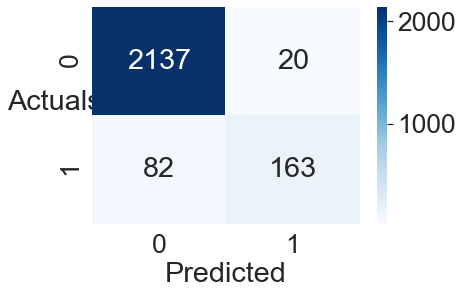

In [98]:
sns.heatmap((metrics.confusion_matrix(Default_train['default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [99]:
163/245

0.6653061224489796

In [100]:
163/183

0.8907103825136612

In [101]:
y_prob_pred_4 = model_4.predict()

In [102]:
y_prob_pred_4

array([1.46662058e-02, 2.39118908e-05, 1.59095901e-09, ...,
       1.23979615e-01, 7.05259294e-04, 4.92726219e-04])

In [103]:
#sns.boxplot(x=Company['default'],y=series_x,raw=True)
#plt.xlabel('default');

In [104]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Default_train['default'],y_prob_pred_train)

In [105]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.22976886575722055

In [106]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.23:
        a=1
    else:
        a=0
    y_class_pred.append(a)

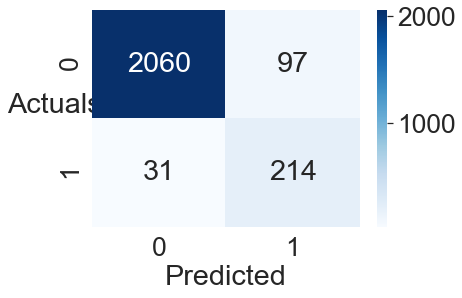

In [107]:
sns.heatmap((metrics.confusion_matrix(Default_train['default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [108]:
print(metrics.classification_report(Default_train['default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.985     0.955     0.970      2157
           1      0.688     0.873     0.770       245

    accuracy                          0.947      2402
   macro avg      0.837     0.914     0.870      2402
weighted avg      0.955     0.947     0.949      2402



In [109]:
y_prob_pred_train

662    0.01
1373   0.00
3268   0.00
3246   0.00
1456   0.04
2092   0.24
3571   0.00
3393   0.00
1912   0.00
845    0.04
542    0.14
1891   0.01
2292   0.02
2611   0.00
1196   0.00
1102   0.00
2642   0.06
3007   0.00
3277   0.00
1487   0.03
2234   0.01
1442   0.00
1048   0.01
2817   0.01
3554   0.00
1866   0.00
1612   0.00
237    1.00
2084   0.10
3249   0.00
1133   0.02
2341   0.00
3440   0.14
163    0.94
1494   0.08
252    0.27
1775   0.12
2333   0.02
930    0.01
1644   0.01
1378   0.00
3156   0.00
2785   0.00
1739   0.01
2453   0.00
1952   0.02
1090   0.00
2860   0.01
1181   0.00
593    0.02
677    0.10
41     1.00
2942   0.00
2098   0.01
2530   0.00
243    0.74
1124   0.05
2288   0.00
1488   0.01
3536   0.00
261    0.00
3366   0.00
1983   0.00
2404   0.00
834    0.00
2761   0.00
1351   0.25
3425   0.00
1392   0.00
340    0.62
2561   0.00
748    0.00
1536   0.01
480    0.22
3020   0.01
3218   0.00
2784   0.00
783    0.18
3070   0.00
2980   0.00
2350   0.00
2876   0.00
1746   0.02
2242

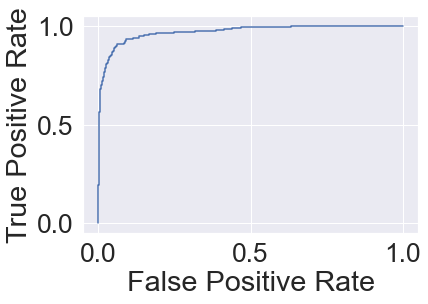

In [110]:
#instantiate the model
log_regression = LogisticRegression()

log_regression.fit(X_train,y_train)
#define metrics
y_pred_proba = log_regression.predict_proba(X_train)[::,1]
lr_train_fpr, lr_train_tpr, _ = metrics.roc_curve(y_train,  y_pred_proba)

#create ROC curve
plt.plot(lr_train_fpr,lr_train_tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [111]:
auc = metrics.roc_auc_score(y_train, y_pred_proba)

In [112]:
auc

0.9702705004115694

In [113]:
y_prob_pred_test = model_4.predict(Default_test)

In [114]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.23:
        a=1
    else:
        a=0
    y_class_pred.append(a)

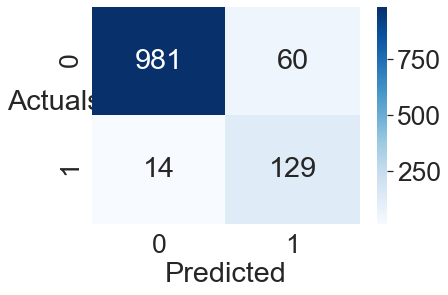

In [115]:
sns.heatmap((metrics.confusion_matrix(Default_test['default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [116]:
print(metrics.classification_report(Default_test['default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.986     0.942     0.964      1041
           1      0.683     0.902     0.777       143

    accuracy                          0.938      1184
   macro avg      0.834     0.922     0.870      1184
weighted avg      0.949     0.938     0.941      1184



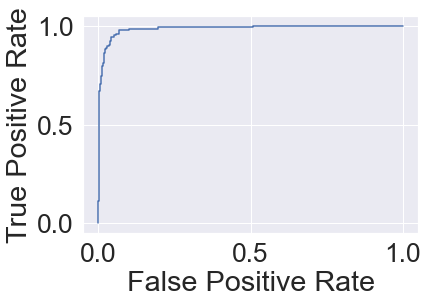

In [117]:
#instantiate the model
log_regression = LogisticRegression()

log_regression.fit(X_test,y_test)
#define metrics
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
lr_test_fpr, lr_test_tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(lr_test_fpr,lr_test_tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [118]:
auc = metrics.roc_auc_score(y_test, y_pred_proba)

In [119]:
auc

0.9862491015228767

# Linear Discriminant Analysis

In [120]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier

In [121]:
LDA = LinearDiscriminantAnalysis()

In [122]:
lda_model = LDA.fit(X_train, y_train)

In [123]:
pred_train_lda = lda_model.predict(X_train)
pred_test_lda = lda_model.predict(X_test)

In [124]:
print(metrics.classification_report(y_train, pred_train_lda))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      2157
           1       0.80      0.58      0.67       245

    accuracy                           0.94      2402
   macro avg       0.87      0.78      0.82      2402
weighted avg       0.94      0.94      0.94      2402



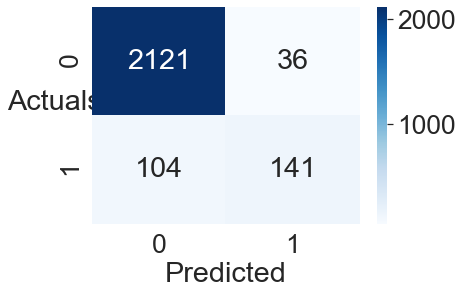

In [125]:
sns.heatmap((metrics.confusion_matrix(y_train,pred_train_lda)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [126]:
print(metrics.classification_report(y_test, pred_test_lda))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1041
           1       0.79      0.61      0.69       143

    accuracy                           0.93      1184
   macro avg       0.87      0.79      0.83      1184
weighted avg       0.93      0.93      0.93      1184



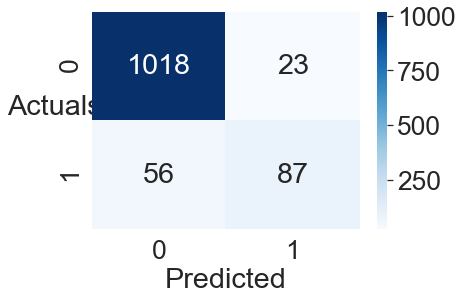

In [127]:
sns.heatmap((metrics.confusion_matrix(y_test,pred_test_lda)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [128]:
pred_train_lda_prob = lda_model.predict_proba(X_train)[:,1]
pred_test_lda_prob = lda_model.predict_proba(X_test)[:,1]

In [129]:
fpr, tpr, thresholds = roc_curve(y_train,pred_train_lda_prob)

In [130]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.10979633740990115

In [131]:
y_class_pred=[]
for i in range(0,len(pred_train_lda_prob)):
    if np.array(pred_train_lda_prob)[i]>0.109:
        a=1
    else:
        a=0
    y_class_pred.append(a)

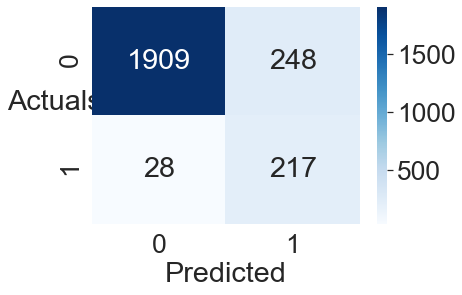

In [132]:
sns.heatmap((metrics.confusion_matrix(y_train,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [133]:
print(metrics.classification_report(y_train, y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.986     0.885     0.933      2157
           1      0.467     0.886     0.611       245

    accuracy                          0.885      2402
   macro avg      0.726     0.885     0.772      2402
weighted avg      0.933     0.885     0.900      2402



In [134]:
y_class_pred=[]
for i in range(0,len(pred_test_lda_prob)):
    if np.array(pred_test_lda_prob)[i]>0.109:
        a=1
    else:
        a=0
    y_class_pred.append(a)

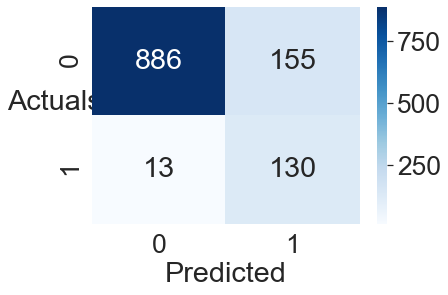

In [135]:
sns.heatmap((metrics.confusion_matrix(y_test, y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [136]:
print(metrics.classification_report(y_test, y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.986     0.851     0.913      1041
           1      0.456     0.909     0.607       143

    accuracy                          0.858      1184
   macro avg      0.721     0.880     0.760      1184
weighted avg      0.922     0.858     0.876      1184



In [137]:
pred_train_lda_prob

array([0.00974398, 0.00188289, 0.00183981, ..., 0.19657886, 0.01133329,
       0.01760111])

AUC for the Training Data: 0.954
AUC for the Test Data: 0.948


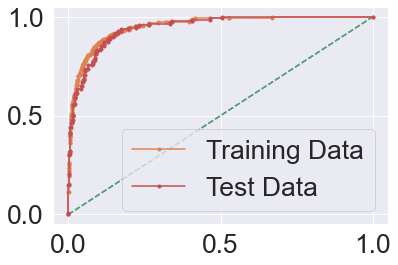

In [138]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_train_lda_prob[:])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
lda_train_fpr, lda_train_tpr, thresholds = metrics.roc_curve(y_train,pred_train_lda_prob[:])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_train_fpr, lda_train_tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_test_lda_prob[:])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
lda_test_fpr, lda_test_tpr, thresholds = metrics.roc_curve(y_test,pred_test_lda_prob[:])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_test_fpr, lda_test_tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

# Random Forest Classifier

In [139]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_leaf': [5, 10, 15],
    'min_samples_split': [15, 30, 45],
    'n_estimators': [25, 50]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid)

In [140]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [15, 30, 45],
                         'n_estimators': [25, 50]})

In [141]:
grid_search.best_params_

{'max_depth': 7,
 'min_samples_leaf': 5,
 'min_samples_split': 45,
 'n_estimators': 50}

In [142]:
best_grid = grid_search.best_estimator_

In [143]:
pred_train_rf = best_grid.predict(X_train)
pred_test_rf = best_grid.predict(X_test)

In [144]:
print(metrics.classification_report(y_train, pred_train_rf))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2157
           1       0.95      0.87      0.91       245

    accuracy                           0.98      2402
   macro avg       0.97      0.93      0.95      2402
weighted avg       0.98      0.98      0.98      2402



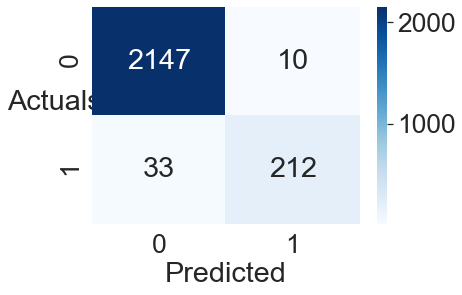

In [145]:
sns.heatmap((metrics.confusion_matrix(y_train, pred_train_rf)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [146]:
rf_metrics=classification_report(y_train, pred_train_rf,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1"][0],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_f1=round(df.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.95
rf_train_recall  0.87
rf_train_f1  0.91


Area under Curve is 0.9959183673469388


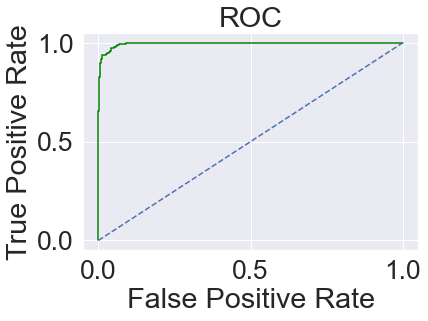

In [147]:
rf_train_fpr, rf_train_tpr,_=roc_curve(y_train,best_grid.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(y_train,best_grid.predict_proba(X_train)[:,1])
print('Area under Curve is', rf_train_auc)

In [148]:
print(metrics.classification_report(y_test, pred_test_rf))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1041
           1       0.94      0.87      0.90       143

    accuracy                           0.98      1184
   macro avg       0.96      0.93      0.94      1184
weighted avg       0.98      0.98      0.98      1184



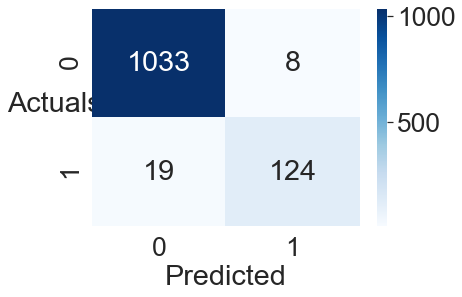

In [149]:
sns.heatmap((metrics.confusion_matrix(y_test, pred_test_rf)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [150]:
rf_metrics=classification_report(y_test, pred_test_rf,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.loc["1"][0],2)
rf_test_recall=round(df.loc["1"][1],2)
rf_test_f1=round(df.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.94
rf_test_recall  0.87
rf_test_f1  0.9


Area under Curve is 0.9904341575811316


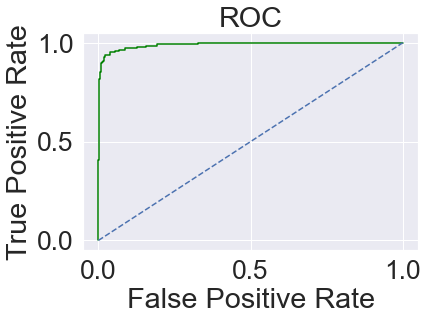

In [151]:
rf_test_fpr, rf_test_tpr,_=roc_curve(y_test,best_grid.predict_proba(X_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(y_test,best_grid.predict_proba(X_test)[:,1])
print('Area under Curve is', rf_test_auc)

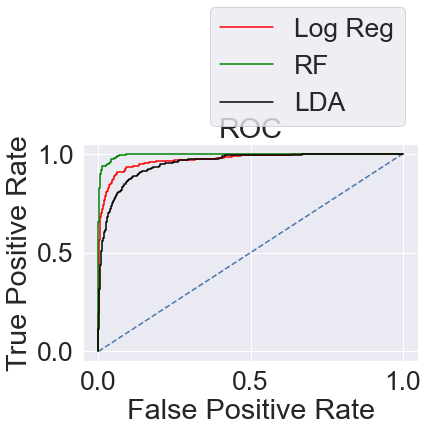

In [152]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lr_train_fpr, lr_train_tpr,color='red',label="Log Reg")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(lda_train_fpr,lda_train_tpr,color='black',label="LDA")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

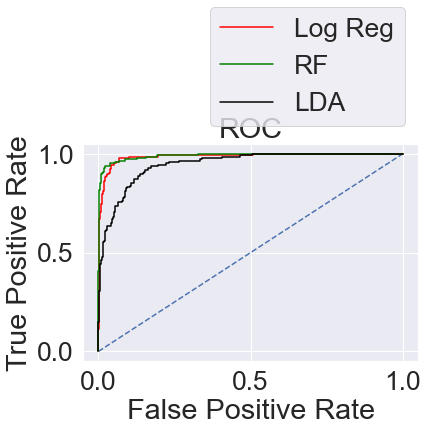

In [153]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lr_test_fpr, lr_test_tpr,color='red',label="Log Reg")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(lda_test_fpr,lda_test_tpr,color='black',label="LDA")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')